In [141]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Dependencies Instalation

In [142]:
!pip install statsmodels seaborn openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# **Telcom customers churn** - **Quiz Assessment**

# **Context**

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

# **Objective**

**What is Churn Analysis ?**

Customer churn analysis is the process of using your churn data to understand :

* Which customers are leaving ?
* Why are they leaving ?
* What can you do to reduce churn ?

As you may have guessed, churn analysis goes beyond just looking at your customer churn rate. It’s about discovering the underlying causes behind your numbers.

Ultimately, successful churn analysis will give you the valuable insights you need to start reducing your business’s customer attrition rate.


**You, as a data scientist at the telco company, have been provided the the following dataset to :**

* **Analyze and build an ML model to help identify which customers are more likely to churn.**
* **Find the factors driving the customer churn process.**
* **Create a profile of the customers which are likely to churn.**

# **Data Description**

The data contains the different attributes of customers and their interaction details with the telco company. The detailed data dictionary is given below.


**Data Dictionary**

Variable | Description
-- | --
CustomerID | A unique ID that identifies each customer.
Gender | The customer’s gender: Male, Female
SeniorCitizen | Indicates if the customer is 65 or older: Yes, No
Married | Indicates if the customer is married: Yes, No
Dependents | Indicates if the customer lives with any dependents: Yes, No. Dependents   could be children, parents, grandparents, etc.
Tenure | Indicates the total amount of months that the customer has been with the   company by the end of the quarter specified above.
PhoneService | Indicates if the customer subscribes to home phone service with the   company: Yes, No
MultipleLines | Indicates if the customer subscribes to multiple telephone lines with the   company: Yes, No
InternetService | Indicates if the customer subscribes to Internet service with the   company: No, DSL, Fiber Optic, Cable.
OnlineSecurity | Indicates if the customer subscribes to an additional online security   service provided by the company: Yes, No
OnlineBackup | Indicates if the customer subscribes to an additional online backup   service provided by the company: Yes, No
DeviceProtection | Indicates if the customer subscribes to an additional device protection   plan for their Internet equipment provided by the company: Yes, No
TechSupport | Indicates if the customer subscribes to an additional technical support   plan from the company with reduced wait times: Yes, No
StreamingTV | Indicates if the customer uses their Internet service to stream   television programing from a third party provider: Yes, No. The company does   not charge an additional fee for this service.
StreamingMovies | Indicates if the customer uses their Internet service to stream movies   from a third party provider: Yes, No. The company does not charge an   additional fee for this service.
Contract | Indicates the customer’s current contract type: Month-to-Month, One Year,   Two Year.
PaperlessBilling | Indicates if the customer has chosen paperless billing: Yes, No
PaymentMethod | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card,   Mailed Check
MonthlyCharges | Indicates the customer’s current total monthly charge for all their   services from the company.
TotalCharges | Indicates the customer’s total charges, calculated to the end of the   quarter specified above.
Churn | Yes = the customer left the company this quarter. No = the customer   remained with the company.

# **Importing libraries**

In [143]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# Encode categorical features as a one-hot numeric array.
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.
from sklearn.preprocessing import LabelEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
# Univariate imputer for completing missing values with simple strategies.
# Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
from sklearn.impute import SimpleImputer


from sklearn import set_config
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import backend

In [144]:
tf.__version__

'2.12.1'

# **Data Overview**

In [145]:
# Let's mount the G. Drive in order to access to the dataset
# from google.colab import drive
# drive.mount('/content/drive')

# Not Run as I'm using Amazon SageMaker Studio Lab to run the assessment

In [146]:
# Read the dataset from csv file into a pandas df
df = pd.read_excel("./Telco-Customer-Churn.xlsx")

In [147]:
# Copy the data to another variable to avoid any changes to original data
data = df.copy()

In [148]:
# Let's view the first 5 records from our dataset
data.head().T

,0,1,2,3,4
CustomerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
Gender,F,M,M,M,F
SeniorCitizen,No,No,No,No,No
Married,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1.00000,34.00000,2.00000,NaN,2.00000
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,FTTX
OnlineSecurity,No,Yes,Yes,Yes,No


In [149]:
data.shape

(7043, 21)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Married           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7038 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
# Checking for missing values in the data
data.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Married              0
Dependents           0
Tenure               5
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             4
PaperlessBilling     0
PaymentMethod        4
MonthlyCharges       3
TotalCharges        11
Churn                0
dtype: int64

In [152]:
# Checking unique values in each categorical column
data.select_dtypes('object').nunique()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Married                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [153]:
# Checking for duplicate values
data.duplicated().sum()

0

In [154]:
# Dropping the columns
data = data.drop(['CustomerID'], axis=1)

# Creating numerical columns
num_cols = ['Tenure',	'MonthlyCharges',	'TotalCharges']

# Creating categorical variables
cat_cols = ['Gender',	'SeniorCitizen',	'Married',	'Dependents',	'PhoneService',	'MultipleLines',
            'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',
            'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod']

## **Question (1)**

Update the bellow cell by providing your comments on following points

* Why CustomerID has been droped ?
* Why do we need to separate numerical & categorical variables ?
* Is there any issues with the dataset ? if yes what's the startegy to fix it ?

## **Response (1)**

<div style="background-color: lightgreen;">

**Observations**
* Why CustomerID has been droped ?

   **Well, For the context of our dataset, the CustomerID column(or feature) should be dropped for many reasons:**
    1. CustomerID is not informative feature and doesn't contain any relvant information about our classification problem,

    2. Preserving that non-informative can even lead to indroducing noise to the model.
    3. We don't know how the CustomerID value is encoded; The CustomerID could contains information about a subgroup for example (eg. A region within California) which could introduce bias,
    4. Privacy concern,

        ... etc


    * ....
</div>

# **Exploratory Data Analysis**

## **Univariate Analysis**

### Categorical variables

In [155]:
data[cat_cols].describe().T

,count,unique,top,freq
Gender,7043,2,M,3555
SeniorCitizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,FTTX,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


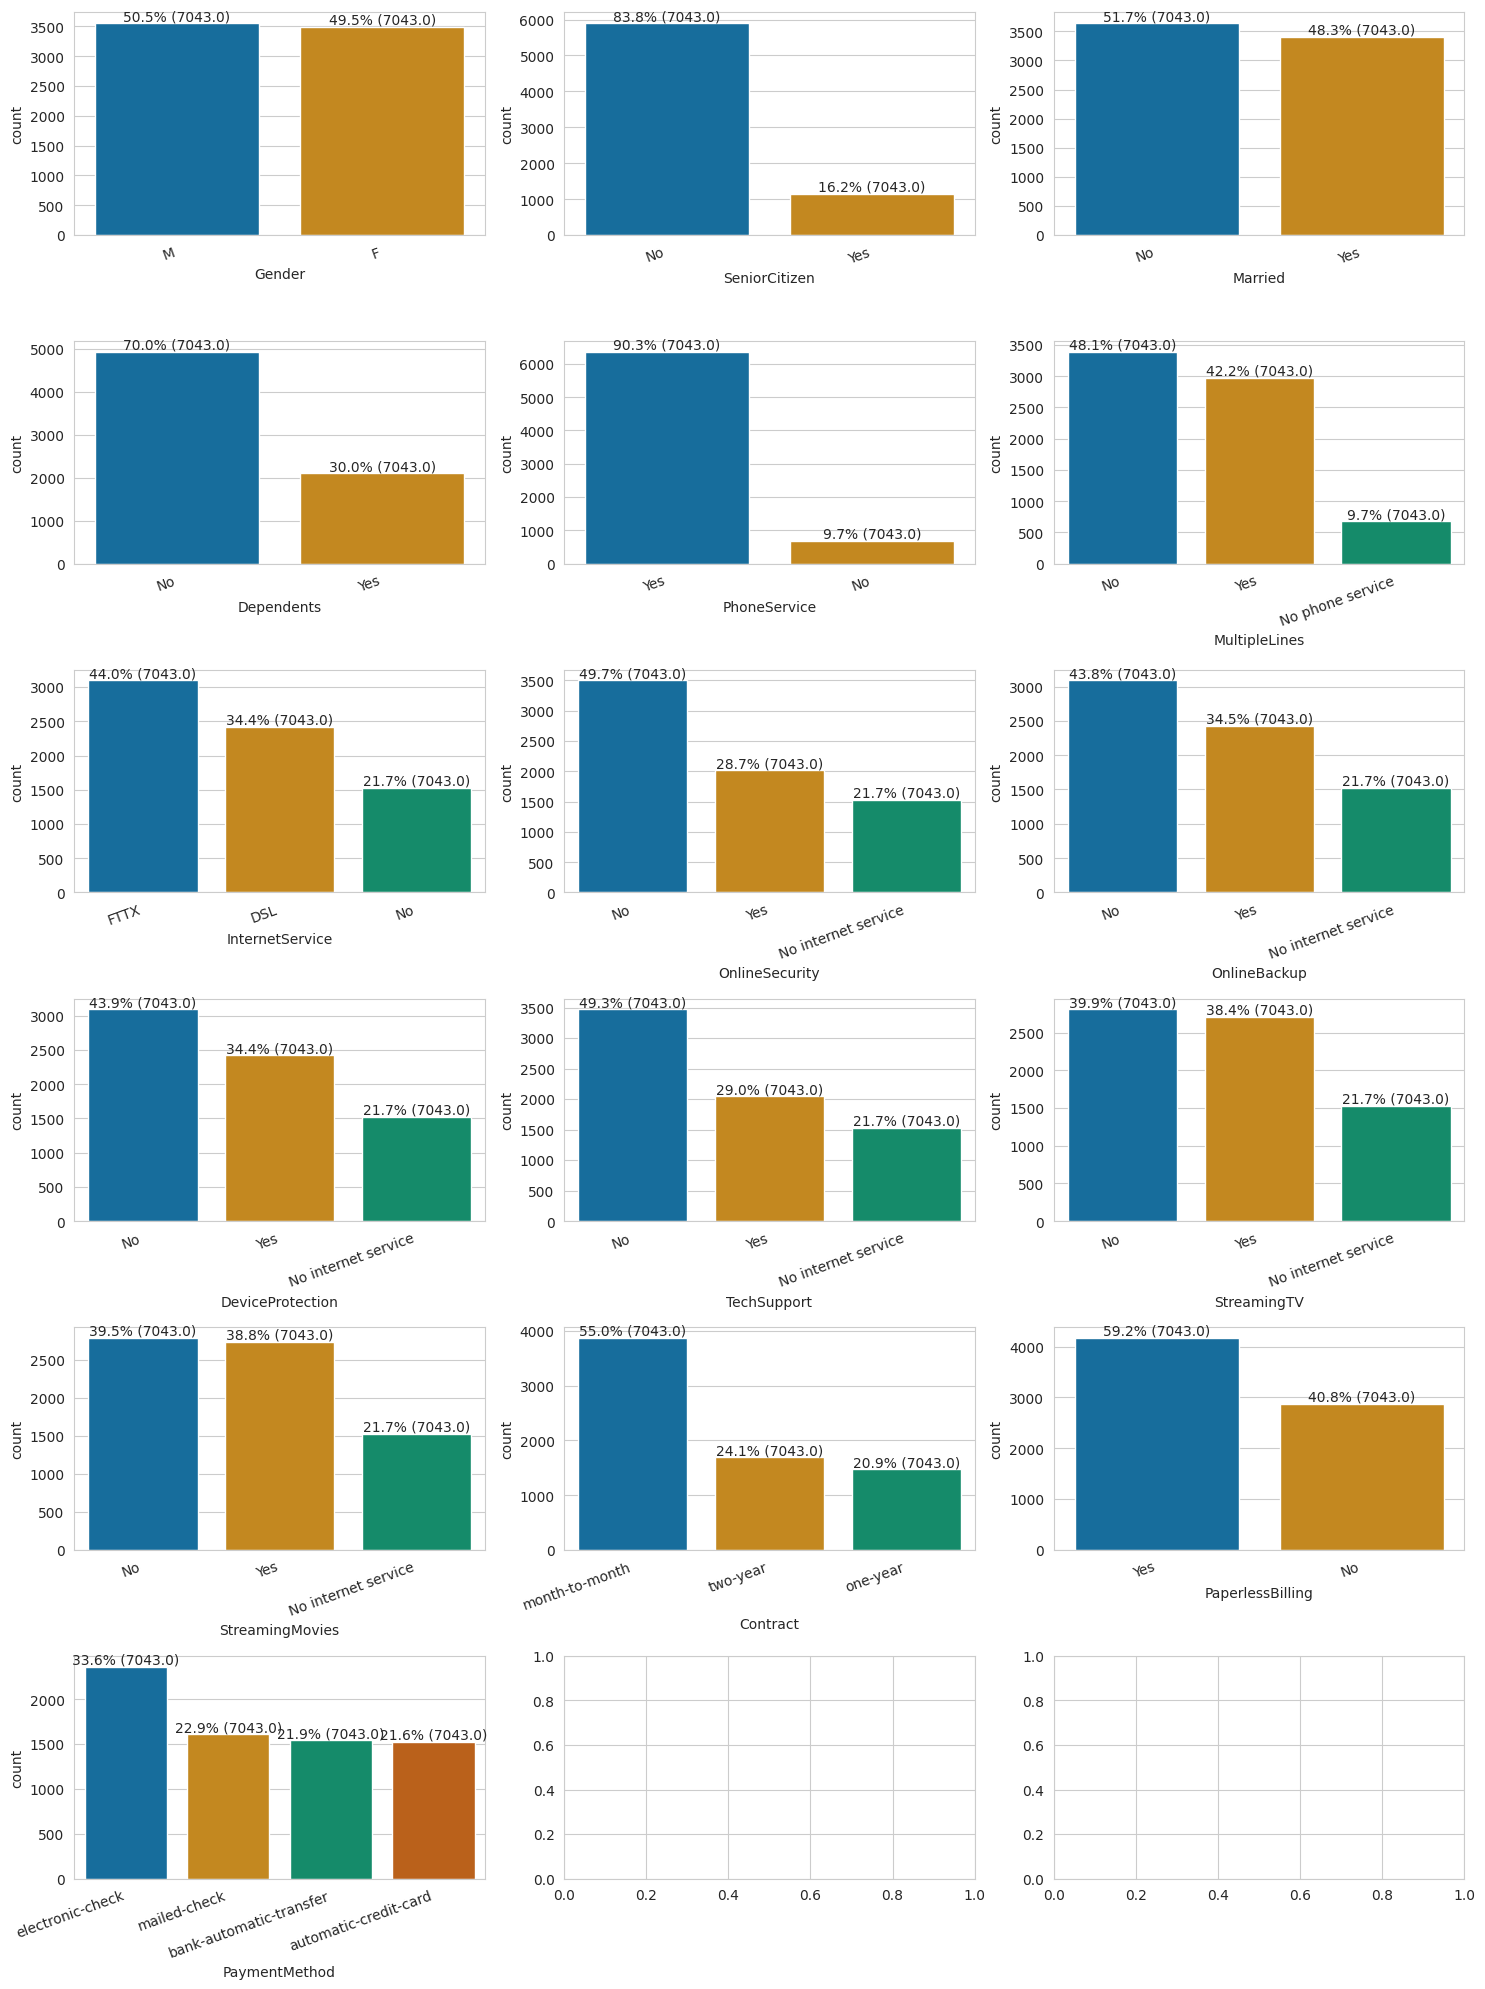

In [156]:
sns.set_style('whitegrid')
# Let's plot the counplot for each categorical variable
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = sns.countplot(ax = axes[ax_i, ax_j], x = j, data = data, order = data[j].value_counts().index, palette='colorblind')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    for p in plot.patches:
      perc = '{:.1f}% ({:.1f})'.format(100 * p.get_height() / len(data[j]), len(data[j])) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2  # Width of the plot
      y = p.get_height()                 # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1

# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (2)**

Update the bellow cell providing your observations on the distributuon of each categorical variable

#### **Response (2)**

<div style="background-color: lightgreen;">

**Observations**
* **Gender** : The ratio between male and female customers in the teleco company is very close.

* **SeniorCitizen** : Most of telco company's customers (83.8%) are under 65 years old.

* **Married**: The percentage of Married customer(48.3%) is close to Non-married customer (51.7%), but the majority aren't married.

* **Dependents**: 70.0% of the company's customers don't live with any dependents.

* **PhoneService**: Most of telco company's customers(90.3%) are subscribed to home phone service with the company.

* **MultipleLines**: Roughly 53.8% of customers that are subscribed to home service have multiple telephone lines with the company.

* **InternetService**: Most of teleco company's customers have FTTX(44.0%) (followed by the DSL(34.4%)) subscription with the company.

* **OnlineSecurity**: Among the customers subscribed to the Internet service (78.4%), the majority (49.7%) are not subscribed to `the security services` provided by the company.

* **OnlineBackup**: Among the customers subscribed to the Internet service (78.4%), the majority (43.8%) are not subscribed to `the backup services` provided by the company.

* **DeviceProtection**: Among customers subscribed to the Internet service (78.4%), the majority (43.9%) are not enrolled in the company's additional device protection plan for their Internet equipment.

* **TechSupport**: Among customers subscribed to the Internet service (78.4%), the majority (49.3%) are not enrolled in the company's additional technical support plan from the company with reduced wait times.

* **StreamingTV**: Of the customers subscribed to the Internet service (78.4%), half of them use their Internet service to stream television programming from a third-party provider.

* **StreamingMovies**: Of the customers subscribed to the Internet service (78.4%), half of them use their Internet service to stream movies from a third party provider.

* **Contract**: Most of company's customers (55.0%) have month-to-month as thier current contract type.

* **PaperlessBilling**: Most of company's customers (59.2%) has chosen paperless billing.

* **PaymentMethod**: Most of company's customers (33.6%) pay their bill via electronic-check.
    
</div>

### Continuous variables

In [157]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,7038.00000,32.35209,24.55601,0.00000,9.00000,29.00000,55.00000,72.00000
MonthlyCharges,7040.00000,64.75424,30.08724,18.25000,35.50000,70.35000,89.85000,118.75000
TotalCharges,7032.00000,2283.30044,2266.77136,18.80000,401.45000,1397.47500,3794.73750,8684.80000


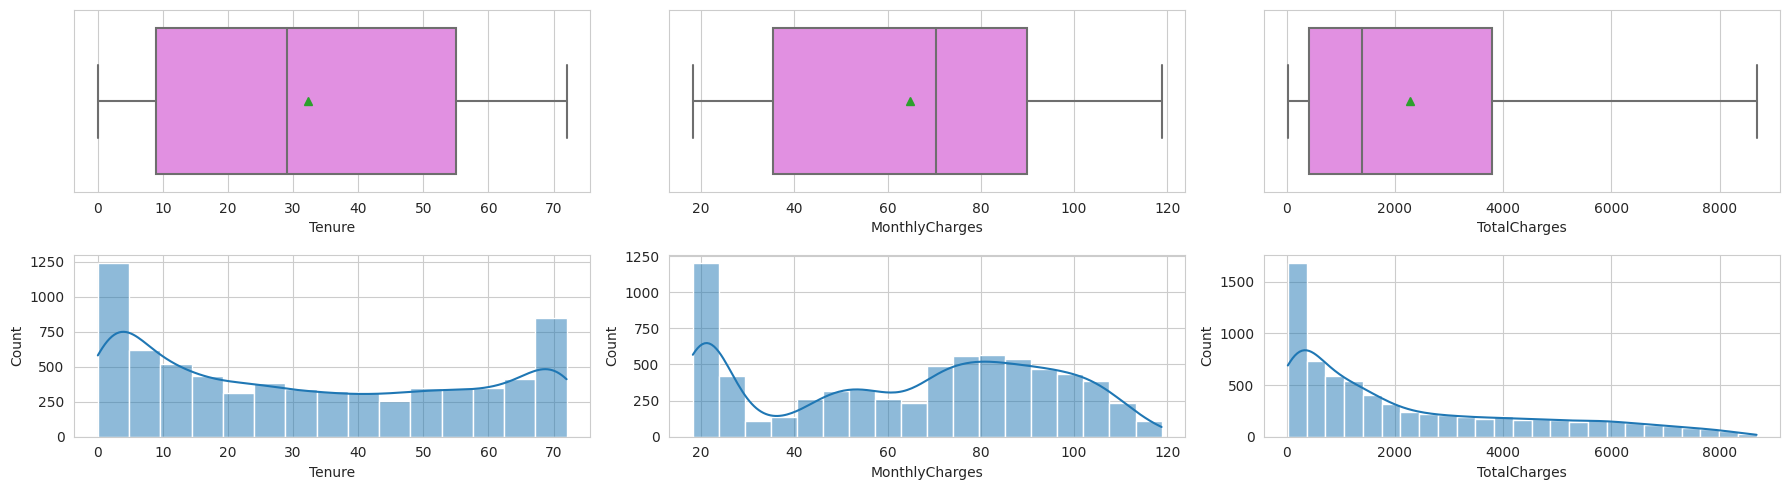

In [158]:
# Plot the boxplot and historgramme for each numerical variable
fig, axes = plt.subplots(2, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x=i, ax=axes[0, ax], showmeans = True, color = "violet")
  sns.histplot(data=data, x=i, kde = True, ax = axes[1, ax], palette = "winter")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (3)**

Update the bellow cell providing your observations on the distributuon of each numerical variable

#### **Response (3)**

<div style="background-color: lightgreen;">

**Observations**
* **Tenure**: The customers' tenure with the company ranges from `0` to `72` months, with a mean of approximately `32.35` months. The median (50th percentile) is `29` months, indicating that the data might be slightly right skewed. The majority of customers seem to have tenures between around `9` and `55` months.

    We don't observe any outliers here but we can prove it mathematically:


    We have: $$Q_1 = 9.0, Q_3 = 55.0, min = 0.0 \,and\, max = 72.0$$
    So:      $$ IQR = Q_3 - Q_1 = 46.0 $$
    Then $$ Q_1 - 1.5*IQR < min, Q_3 + 1.5 * IQR = 124 > max => So\,no\,outliers$$ 

* **Monthly charges**: The monthly charges vary from `$18.25` to `$118.75`, with an average (mean) of about `$64.75`. The median monthly charge is `$70.35`.


    We don't observe any outliers here but we can prove it mathematically:

    We have: $$Q_1 = 35.5, Q_3 = 89.85, min = 18.25 \,and\, max = 118.75$$
    So:      $$ IQR = Q_3 - Q_1 = 54.35 $$
    Then $$ Q_1 - 1.5*IQR < min, Q_3 + 1.5 * IQR = 171.375 > max => So\,no\,outliers$$ 


* **Total charges**: Total charges range from `$18.80` to `$8684.80`, with a mean of approximately `$2283.30`. The median total charge is `$1397.48`. There seems to be some variability in the total charges, with a wide spread indicated by the standard deviation. 

    We don't observe any outliers here but we can prove it mathematically:

    We have: $$Q_1 = 401.45, Q_3 = 3794.73, min = 18.80 \,and\, max = 8684.80$$
    So:      $$ IQR = Q_3 - Q_1 = 3393.28 $$
    Then $$ Q_1 - 1.5*IQR < min, Q_3 + 1.5 * IQR = 8884.65 > max => So\,no\,outliers$$ 

</div>


## **Bivariate Analysis**

### Categorical variables

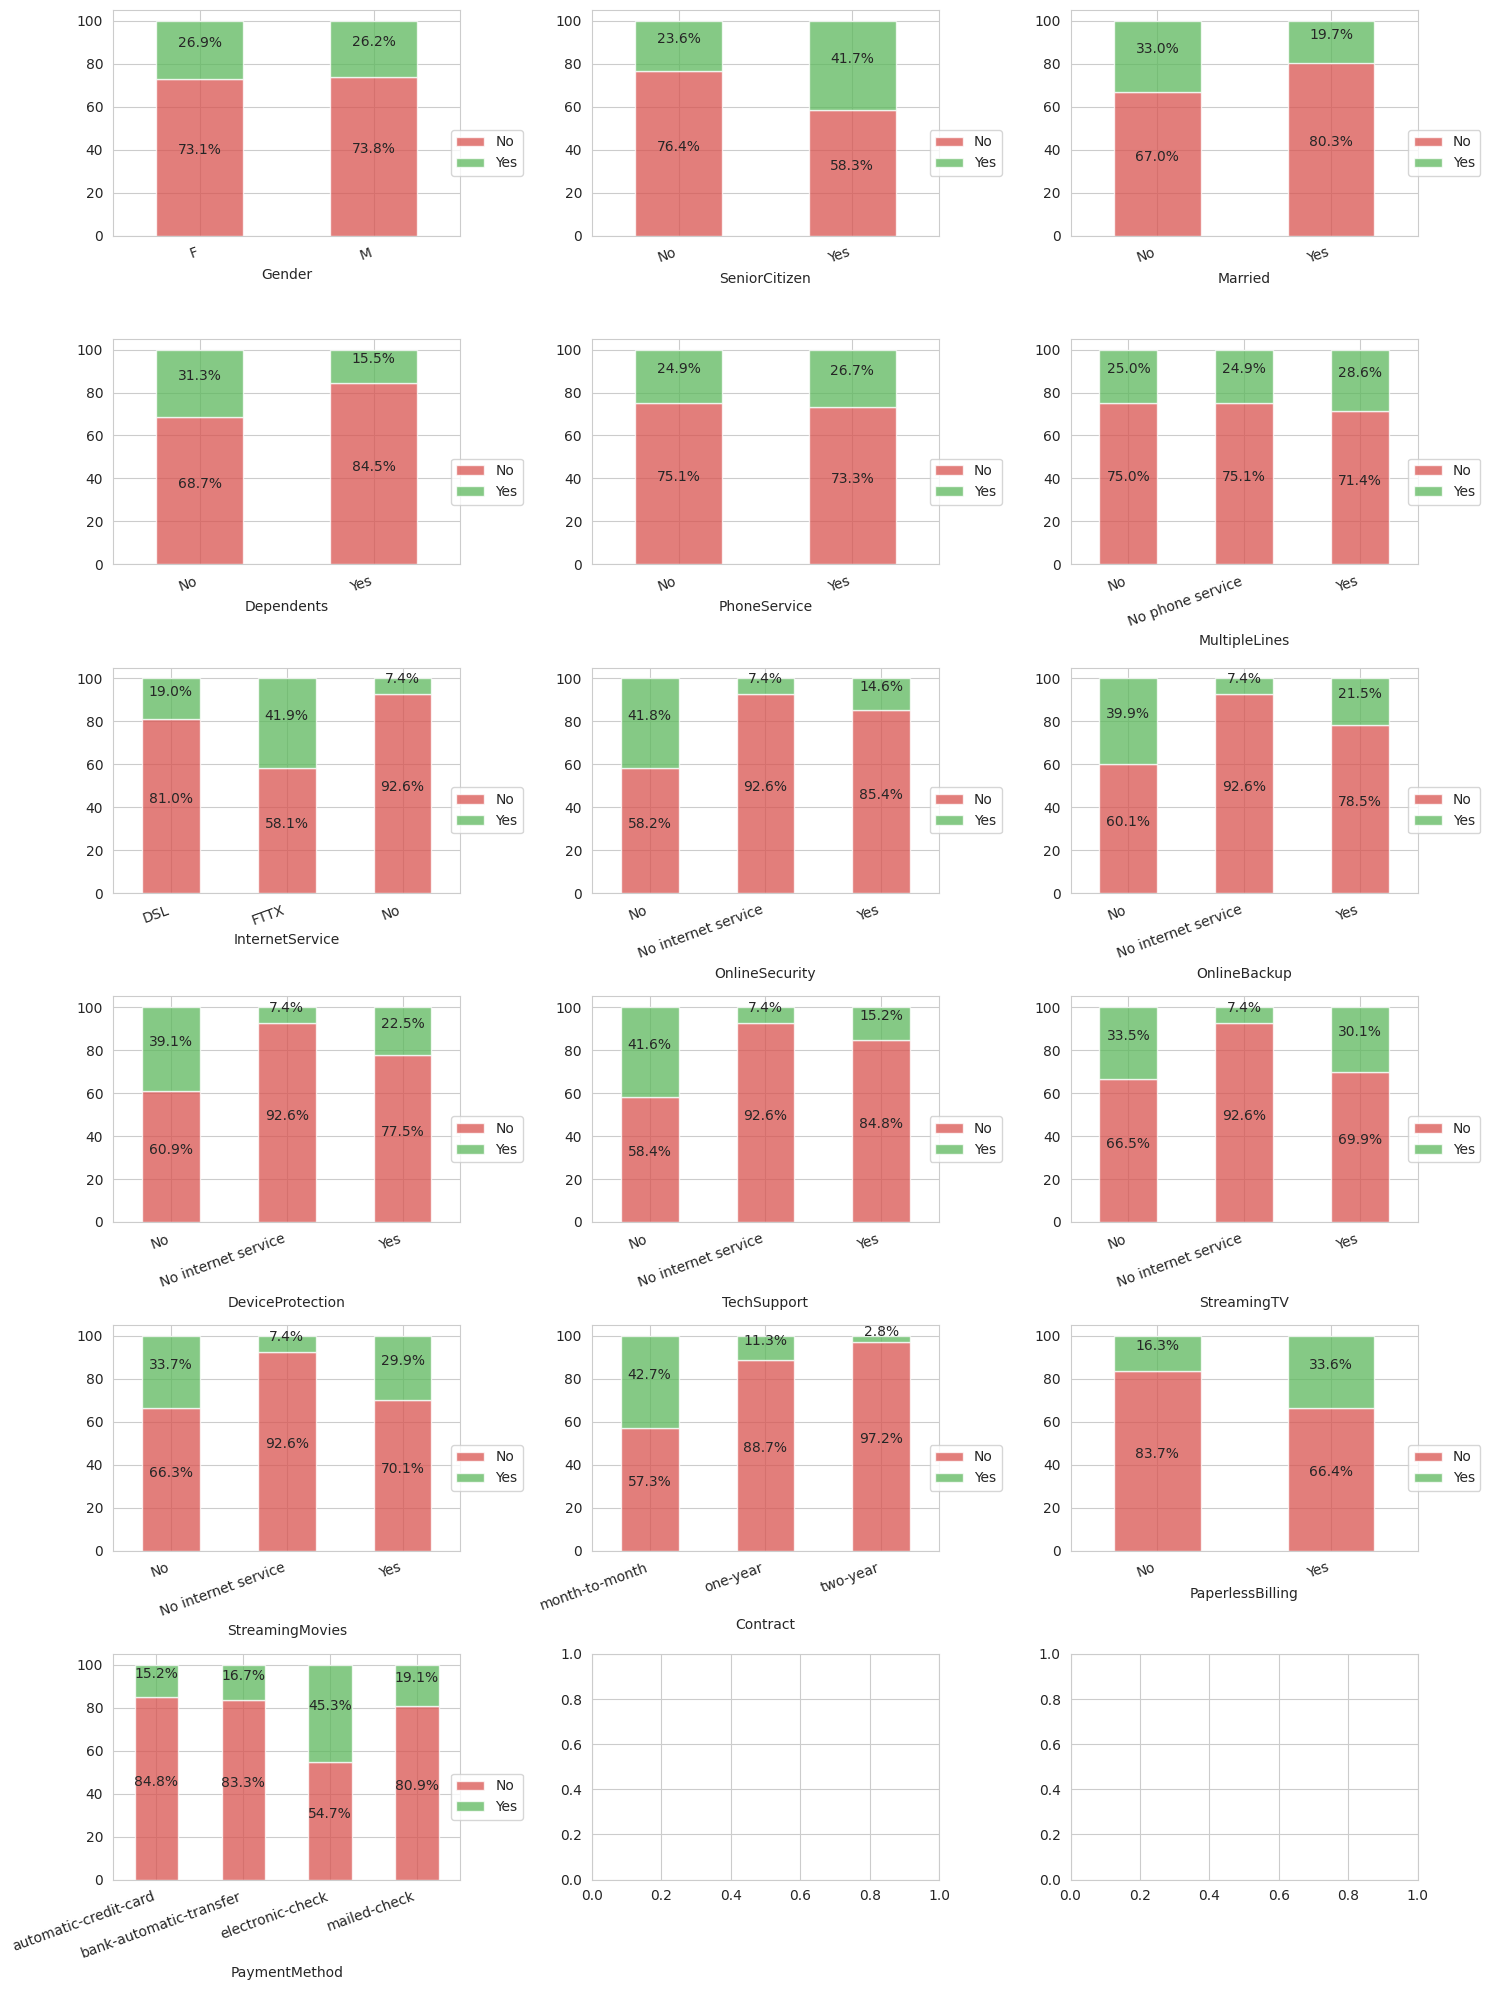

In [159]:
sns.set_style('whitegrid')
# Let's plot a barplot for each categorical variable showing how it participates in the conversion of leads
# Sow each 3 variables in one line of the grid
cat_col = [
            ['Gender',	'SeniorCitizen',	'Married'],
            ['Dependents', 'PhoneService',	'MultipleLines'],
            ['InternetService',	'OnlineSecurity', 'OnlineBackup'],
            ['DeviceProtection',	'TechSupport', 'StreamingTV'],
            ['StreamingMovies',	'Contract',	'PaperlessBilling'],
            ['PaymentMethod']
           ]
fig, axes = plt.subplots(6, 3, figsize = (15, 20))
ax_i = 0
for i in cat_col:
  ax_j = 0
  for j in i:
    plot = (pd.crosstab(data[j], data['Churn'], normalize='index') * 100).plot(kind='bar', stacked=True, ax=axes[ax_i, ax_j], alpha=0.75, rot=0, colormap='Paired', color=['#d9534f', '#5cb85c'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=20, ha="right")
    patches, labels = plot.get_legend_handles_labels()
    plot.legend(patches, labels, bbox_to_anchor=(1.2, 0.5))
    for p in plot.patches:
      perc = '{:.1f}%'.format(p.get_height()) # Percentage of each class of the category
      x = p.get_x() + p.get_width() / 2   # Width of the plot
      y = p.get_y() + p.get_height() / 2  # Height of the plot
      plot.annotate(perc, (x, y), ha = "center", va = "center", size = 10, xytext = (0, 5), textcoords = "offset points")        # Annotate the percentage
    # Move to the next position in the grid line
    ax_j = ax_j + 1
  # Move to the next line of the grid
  ax_i = ax_i + 1


# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (4)**

Update the bellow cell providing your observations on how each numerical variable categorical to the churn of customers

#### **Response (4)**

<div style="background-color: lightgreen;">

**Observations**
* **Gender**: Customer churn appears to be independent of the gender of the customers.

* **SeniorCitizen**: An overwhelming majority of customers, accounting for 83.8%, fall into the non-Senior Citizen category, while older customers display a higher churn rate of 41.7% compared to younger ones. This observation underscores a discernible correlation between Senior Citizen status and the churn feature, indicating that elderly individuals are more prone to churning.

* **Married**: Given the nearly balanced distribution between married and non-married customers, it's notable that the churn rate for non-married customers stands at 33.0%, surpassing the churn rate of 19.7% among married customers. This discrepancy suggests a tendency for non-married customers to exhibit a higher churn rate, indicating a potentially greater challenge in retaining their loyalty compared to their married counterparts.

* **Dependents**: A significant 70% of the telecommunications company's customers reside without any dependents, while the remaining 30% have dependents. Upon observing the corresponding bar plot, it becomes evident that customers without dependents exhibit a higher churn rate of 31.3%. Thus, it can be inferred that customers with dependents tend to have a relatively lower churn rate, highlighting their inclination towards greater loyalty and retention.

* **PhoneService**: With approximately 90.3% of the telecommunications company's customers utilizing Phone Service and a mere 10% opting for non-phone services, the churn rate remains impressively low at around 24.9% in contrast to the considerable volume. Interestingly, the attrition rate among non-phone service users, constituting only 10% of the total population, mirrors the churn rate of approximately 26.7%. These statistics collectively highlight the greater benefits of steering customers towards subscribing to Phone Service, as it not only forms the majority but also demonstrates a notably lower churn rate, underscoring its attractiveness and potential for bolstering customer retention.

* **MultipleLines**: Within the subset of Phone Service users, the distribution between those with Multiple Lines and those with a Single Line is nearly equal at 45% each (respectivelly, 48.1% and 42.2%). Despite a slightly higher churn rate among users with Multiple Lines, the difference is not particularly significant, standing at approximately 28% (respectivelly 28.6% and 25%).

* **InternetService**: Around 21.7% of customers do not utilize internet services. Among the internet users (constituting the remaining78.3%), approximately 44% opt for FTTX and 34.4% for DSL. Remarkably, the churn rate among FTTX users is roughly 42%, while DSL users experience a lower 19.0% churn rate. This discrepancy underscores the importance for the service provider to scrutinize the quality of its internet service and the teleco companny needs to look into the quality of its internet services.

* **OnlineSecurity**: Among the customers subscribed to the Internet service (78.4%), the majority (49.7%) are not subscribed to the security services provided by the company, and churn rate among such users is highest (41.8%) underscoring the potential significance of bolstering security offerings to mitigate customer attrition.

* **OnlineBackup**: Among the customers subscribed to the Internet service (accounting for 78.4% of the total), it's notable that the majority (43.8%) have opted out of subscribing to the online backup services offered by the company. Interestingly, the churn rate among this specific user group is the highest, reaching 39.9%. This observation highlights the potential significance of enhancing and promoting online backup offerings as a strategy to counter customer attrition effectively.


* **DeviceProtection**: Among the customers subscribed to the Internet service (making up 78.4% of the total), it's worth noting that the majority (43.9%) have chosen not to subscribe to the device protection services provided by the company. Intriguingly, the churn rate within this particular user segment is the highest at 39.1%. This finding underscores the potential importance of improving and marketing device protection offerings as a strategic approach to effectively address customer attrition.


* **TechSupport**: Among the customers subscribed to the Internet service (accounting for 78.4% of the total), it's notable that the majority (49.3%) have opted out of subscribing to the technical support services offered by the company. Interestingly, the churn rate among this specific user group is the highest, reaching 41.6%. This observation highlights the potential significance of enhancing and promoting technical support offerings as a strategy to counter customer attrition effectively.


* **StreamingTV**: Among users with internet services, constituting 78.4% of the total, a substantial portion, approximately 38.4%, engage in using streaming TV service. Interestingly, the churn rate remains relatively consistent at around 30%, regardless of whether customers utilize streaming TV services or not.

* **StreamingMovies**: Among users with internet services, constituting 78.4% of the total, a substantial portion, approximately 38.4%, engage in using streaming Movies service. Interestingly, the churn rate remains relatively consistent at around 30%, regardless of whether customers utilize streaming Movies services or not.

* **Contract**: Roughly 55% of the customers are enrolled in month-to-month plans, with slightly over 20% each opting for 1-year or 2-year contracts. Notably, the churn rate is notably elevated among monthly customers, while it's least among those on 2-year contracts. This pattern aligns with expectations due to the differing contract durations. 

* **PaperlessBilling**: Most of company's customers (59.2%) has chosen paperless billing, and 33.5% of them churn, on the other hand 40.8% hasn't chosen paperless billing, and 16.3% of them churn. So it appears that customer churn is independent of the PaperlessBilling.

* **PaymentMethod**: The segment of customers using "electronic-check" as their payment method constitutes a slightly larger portion, around 33.6%, compared to those using other modes of payment(roughlt 20% each). Interestingly, this group also experiences the highest churn rate at approximately 45.3%. This observation prompts the telecom company need to consider initiatives aimed at encouraging customers to adopt automated modes of payment, thereby enhancing customer retention and mitigating the heightened churn rate associated with the "clectronic-check" option.
    
</div>

### Continuous variables

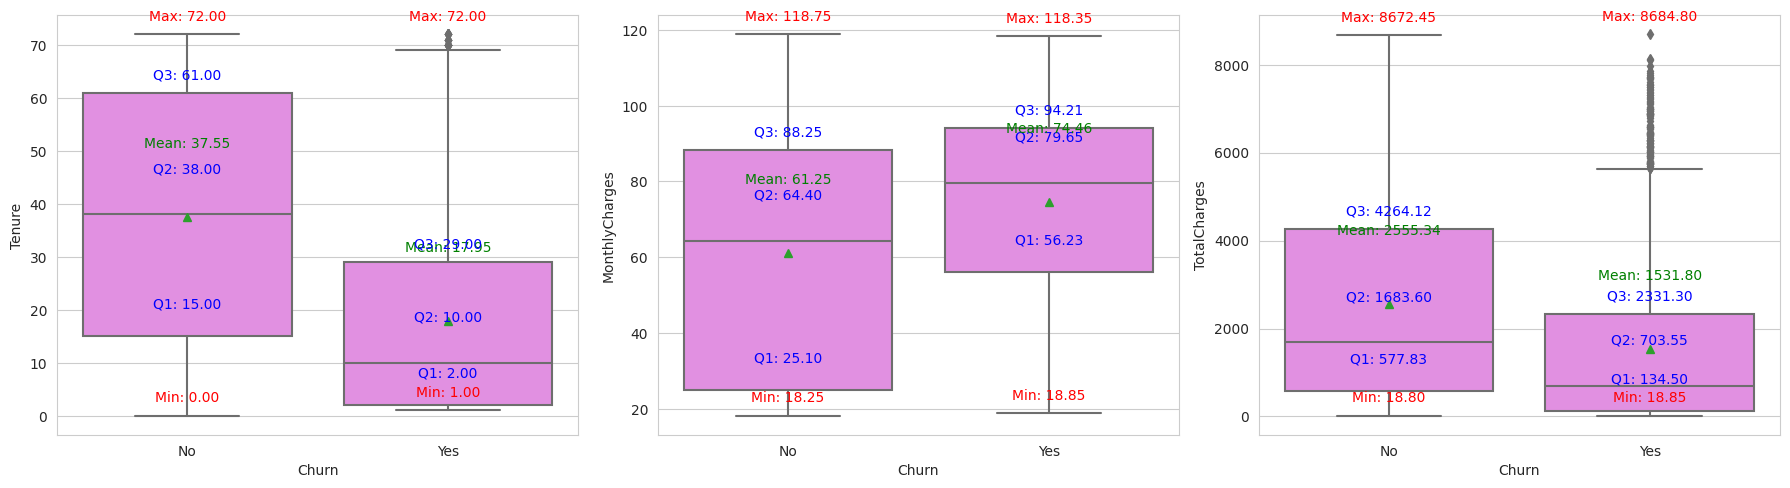

In [160]:

# Plot the boxplot for each numerical variable with the split of status

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax = 0

for i in num_cols:
    sns.boxplot(data=data, x='Churn', y=i, ax=axes[ax], showmeans=True, color="violet")
    
    # Calculate statistics
    q1 = data.groupby('Churn')[i].quantile(0.25)
    q2 = data.groupby('Churn')[i].median()
    q3 = data.groupby('Churn')[i].quantile(0.75)
    mean = data.groupby('Churn')[i].mean()
    data_min = data.groupby('Churn')[i].min()
    data_max = data.groupby('Churn')[i].max()
    
    # Annotate statistics on the boxplot
    for j, status in enumerate(data['Churn'].unique()):
        axes[ax].annotate(f'Q1: {q1[status]:.2f}', xy=(j, q1[status]), xytext=(0, 20), textcoords='offset points', ha='center', color='blue')
        axes[ax].annotate(f'Q2: {q2[status]:.2f}', xy=(j, q2[status]), xytext=(0, 30), textcoords='offset points', ha='center', color='blue')
        axes[ax].annotate(f'Mean: {mean[status]:.2f}', xy=(j, mean[status]), xytext=(0, 50), textcoords='offset points', ha='center', color='green')
        axes[ax].annotate(f'Q3: {q3[status]:.2f}', xy=(j, q3[status]), xytext=(0, 10), textcoords='offset points', ha='center', color='blue')
        axes[ax].annotate(f'Min: {data_min[status]:.2f}', xy=(j, data_min[status]), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
        axes[ax].annotate(f'Max: {data_max[status]:.2f}', xy=(j, data_max[status]), xytext=(0, 10), textcoords='offset points', ha='center', color='red')
    
    # Move to the next position in the same line of the grid
    ax += 1

# Set the spacing between subplots
fig.tight_layout()
plt.show()


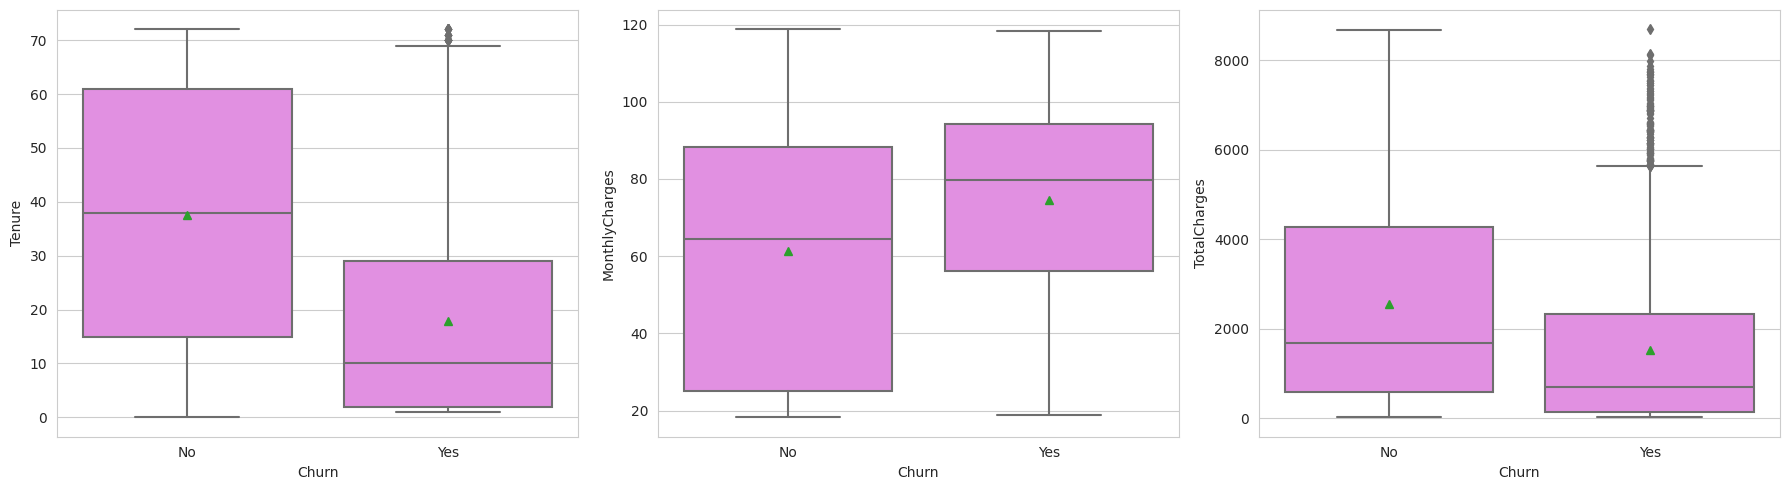

In [161]:
# Plot the boxplot for each numerical variable with the split of status
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
ax = 0
for i in num_cols:
  sns.boxplot(data=data, x='Churn', y=i, ax=axes[ax], showmeans=True, color="violet")
  # Move to the next position in the same line of the grid
  ax = ax + 1
# set the spacing between subplots
fig.tight_layout()
plt.show()

#### **Question (5)**

Update the bellow cell providing your observations on how each numerical variable contribute to the churn of customers

#### **Response (5)**

<div style="background-color: lightgreen;">

**Observations**
* **Tenur**: 

    - The boxplot depicting retained customers ("No") reveals a data range from 0 to 72 months, showcasing the varying tenure durations of customers who have not churned. The interquartile range (IQR), which spans from the first quartile (Q1) at 15 months to the third quartile (Q3) at 61 months, encompasses the middle 50% of the data, illustrating the dispersion within this central interval. Both the median and mean, situated at 38 months, emphasize a central tendency where the middle value and average tenure converge. This convergence indicates a balanced distribution without significant skewness. The proximity of the median to the mean suggests a relatively symmetrical distribution, devoid of prominent outliers that might distort the mean. To summarize, the boxplot characterizes retained customers with a diverse yet centered spread of tenure lengths, showcasing a stable customer base.

    - For the boxplot related to churned customers ("Yes"), the data spans 0 to 68 months, with an interquartile range (IQR) from 1 to 29 months. The mean exceeds the median, and there are data points above the upper "whisker" of the boxplot, suggesting outliers with longer tenure lengths(> 70 months).

* **MonthlyCharges**:

    - The boxplot corresponding to customers who haven't churned ("No") in relation to their monthly charges unveils insightful patterns. The data range extends from a minimum of 18 to a maximum of 120, effectively encapsulating a wide spectrum of monthly charges for retained customers. The interquartile range (IQR), calculated as the difference between the third quartile (Q3) at 88 and the first quartile (Q1) at 25, spans 63. This IQR sheds light on the spread of the middle 50% of data. Within this range, the median, positioned at 65, surpasses the mean by a slight margin, with the mean valued at 61. This indicates a distribution where the majority of monthly charges fall below the median, leading to a subtly left-skewed distribution. Notably, the first quartile (Q1) at 25 and the third quartile (Q3) at 88 signify that the lower 25% of customers pay less than 25 per month, while the upper 25% pay above 88. 
    
    - The boxplot for customers who haven't churned ("No") in terms of their monthly charges displays a range from 19 to 120. The interquartile range (IQR) spans 38 (56 to 94), encompassing the middle 50% of charges. The median, at 80, surpasses the mean of 72, indicating a central tendency. Notably, the absence of outliers contributes to a balanced distribution, with most charges falling between 56 and 94.
* **Churn**:

    - The boxplot for customers who haven't churned ("No") in terms of their total charges spans from 18.8 to 8684, encompassing a wide range. The interquartile range (IQR), from 401 to 4264, represents the middle 50% of data. The median at 1683 is below the mean of 2555, indicating a right-skewed distribution influenced by higher values. This suggests that the majority of customers have total charges within the IQR's range.
    
    - The boxplot for retained customers ("No") reveals total charges ranging from 18.8 to 8684, with an interquartile range (IQR) of 3863 (401 to 4264). The median at 1683 is below the mean of 2555, indicating a right-skewed distribution influenced by higher values. Most customers have total charges within this IQR's range.
    
</div>

## **Multivariate Analysis**

<Axes: >

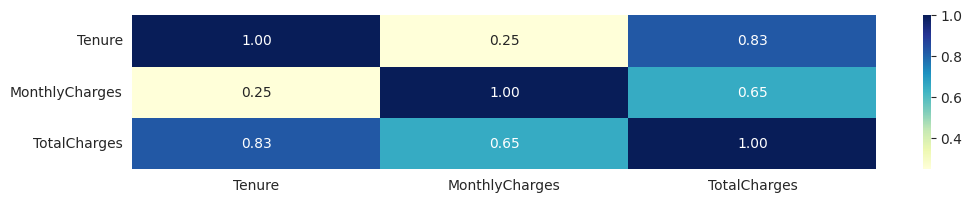

In [162]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(12, 2))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='0.2f', cmap='YlGnBu')

#### **Question (6)**

Update the bellow cell providing your observations on the correlation matrix

#### **Response (6)**

<div style="background-color: lightgreen;">

**Observations**
* The correlation coefficient of 0.83 observed between "Tenure" and "TotalCharges" signifies a robust positive correlation. This observation implies a noteworthy inclination for customers with extended "Tenure" to exhibit higher "TotalCharges."

* The value 0.65 between "MonthlyCharges" and "TotalCharges" indicates a positive correlation as well. This suggests that higher monthly charges are associated with higher total charges, but the correlation might not be very strong.

* The value 0.24752 in the matrix indicates the correlation between "Tenure" and "MonthlyCharges." This positive correlation suggests that, as "Tenure" increases, there's a tendency for "MonthlyCharges" to increase, but the correlation is not very strong.

</div>

In [163]:
num_cols

['Tenure', 'MonthlyCharges', 'TotalCharges']

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [164]:
data.head(2).transpose()

,0,1
Gender,F,M
SeniorCitizen,No,No
Married,Yes,No
Dependents,No,No
Tenure,1.00000,34.00000
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes
OnlineBackup,Yes,No


In [165]:
# Columns to be droped if required
# col_drop = ['Gender', '', '', '']
#data.drop(col_drop, axis=1, inplace=True)

# **Data Preprocessing**

## **Splitting the Data**

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required </span>

In [166]:
data.isna().sum()/data.shape[0]

Gender             0.00000
SeniorCitizen      0.00000
Married            0.00000
Dependents         0.00000
Tenure             0.00071
PhoneService       0.00000
MultipleLines      0.00000
InternetService    0.00000
OnlineSecurity     0.00000
OnlineBackup       0.00000
DeviceProtection   0.00000
TechSupport        0.00000
StreamingTV        0.00000
StreamingMovies    0.00000
Contract           0.00057
PaperlessBilling   0.00000
PaymentMethod      0.00057
MonthlyCharges     0.00043
TotalCharges       0.00156
Churn              0.00000
dtype: float64

In [167]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data['Churn'] = data['Churn'].astype(int)

**Separating the independent variables (X) and the dependent variable (Y)**

In [168]:
## Separating Independent and Dependent Columns
X = data.drop(['Churn'], axis=1)
Y = data[['Churn']]

In [169]:
Y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [170]:
X.head(6).T

,0,1,2,3,4,5
Gender,F,M,M,M,F,F
SeniorCitizen,No,No,No,No,No,No
Married,Yes,No,No,No,No,No
Dependents,No,No,No,No,No,No
Tenure,1.00000,34.00000,2.00000,NaN,2.00000,8.00000
PhoneService,No,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes
InternetService,DSL,DSL,DSL,DSL,FTTX,FTTX
OnlineSecurity,No,Yes,Yes,Yes,No,No
OnlineBackup,Yes,No,Yes,No,No,No


**Splitting the data into 70% train and 30% test set**

In [208]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

## **Transforming the dataset**

In [209]:
X_train.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      3
TotalCharges        7
dtype: int64

In [210]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              2
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            4
PaperlessBilling    0
PaymentMethod       2
MonthlyCharges      0
TotalCharges        4
dtype: int64

**Missing Value Imputation** : As you can see we have some variables with missing values :
* Tenure
* MonthlyCharges
* Contract
<div style="background-color: red;">

    * PaperlessBilling; remark: I guess this feature hasn't missing values
</div>
* PaymentMethod

We Will impute the missing values in columns using :
* their **mode** for categorical variables
* their **mean** for continuous variables

### **Question (7)**

* Create the required python code for the missing values imputation applied to continuous & categorical variables.
* Explain reasons behind applying these transformations after the data splitting ?

<div style="background-color: lightgreen;">
    
 1.  Imputing missing data before data splitting can lead to data leakage, where information from the test set influences the training process. By imputing after splitting, we ensure that the imputed values are not influenced by the test set, maintaining the integrity of the evaluation process.
    
 2.  Imputing after splitting ensures that the imputed values are realistic and aligned with the characteristics of each subset.
    
 3.  Imputing after splitting helps the model generalize better to unseen data. 
</div>

In [211]:
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_mean = SimpleImputer(strategy="mean")

In [212]:
# Provide code here for Question (7)

# Impute missing values for categorical variables with mode
categorical_cols = ['Contract', 'PaymentMethod']
X_train[categorical_cols] = imputer_mode.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = imputer_mode.transform(X_test[categorical_cols])

# Impute missing values for continuous variables with mean
continuous_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
X_train[continuous_cols] = imputer_mean.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = imputer_mean.transform(X_test[continuous_cols])

In [213]:
X_train.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [214]:
X_test.isnull().sum()

Gender              0
SeniorCitizen       0
Married             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

There are two common ways to convert categorical variables into numeric variables:

1. Label Encoding: Assign each categorical value an integer value based on alphabetical order.

2. One Hot Encoding: Create new variables that take on values 0 and 1 to represent the original categorical values. When using this approach, we create one new column for each unique value in the original categorical variable.

In [215]:
# Printing the % subcategories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True) * 100)
    print('*' * 40)
    print()

Gender
M   50.47565
F   49.52435
Name: proportion, dtype: float64
****************************************

SeniorCitizen
No    83.78532
Yes   16.21468
Name: proportion, dtype: float64
****************************************

Married
No    51.69672
Yes   48.30328
Name: proportion, dtype: float64
****************************************

Dependents
No    70.04118
Yes   29.95882
Name: proportion, dtype: float64
****************************************

PhoneService
Yes   90.31663
No     9.68337
Name: proportion, dtype: float64
****************************************

MultipleLines
No                 48.13290
Yes                42.18373
No phone service    9.68337
Name: proportion, dtype: float64
****************************************

InternetService
FTTX   43.95854
DSL    34.37456
No     21.66690
Name: proportion, dtype: float64
****************************************

OnlineSecurity
No                    49.66634
Yes                   28.66676
No internet service   21.66690
Name: 

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Married           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7038 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7039 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7039 non-null   object 


### **Question (8)**

In [217]:
col_encoded = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

<div style="background-color: lightgreen;">
Encoding strategy for each of the listed categorical features:
    
    
* **SeniorCitizen:** Binary encoding is suitable for binary categorical variables. It maps 'No' to 0 and 'Yes' to 1. 
* **Married:** Binary Encoding similar to 'SeniorCitizen'.
* **Dependents:** Binary encoding for the same reason.
* **PhoneService:** Binary encoding is appropriate for binary categorical variables.
* **MultipleLines:** We've more than two categories and no clear ordinal relationship, one-hot encoding is used.
* **InternetService:** One-Hot Encoding.
* **OnlineSecurity:** One-Hot Encoding
* **OnlineBackup:** One-Hot Encoding
* **DeviceProtection:** One-Hot Encoding
* **TechSupport:** One-Hot Encoding
* **StreamingTV:** One-Hot Encoding
* **StreamingMovies:** One-Hot Encoding
* **PaperlessBilling:** Binary encoding suits binary categorical variables.
    
</div>

In [218]:
X_train.head().T

,5557,2270,6930,2257,898
Gender,F,F,F,F,F
SeniorCitizen,No,Yes,No,No,No
Married,No,No,Yes,No,No
Dependents,No,No,No,No,No
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,No,No,Yes,Yes,No
InternetService,FTTX,FTTX,FTTX,DSL,FTTX
OnlineSecurity,No,No,No,No,Yes
OnlineBackup,No,No,No,No,No


In [219]:
X_test.head().T

,4994,6828,755,404,981
Gender,F,F,M,M,M
SeniorCitizen,No,No,Yes,No,No
Married,No,Yes,No,No,Yes
Dependents,No,Yes,No,No,Yes
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,No,No,Yes,No,No
InternetService,FTTX,No,FTTX,No,No
OnlineSecurity,Yes,No internet service,No,No internet service,No internet service
OnlineBackup,No,No internet service,No,No internet service,No internet service


In [220]:
# Provide code here for Question (8)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# Binary Encoding for binary categorical variables
binary_encoder = LabelEncoder()
binary_cols = ['SeniorCitizen', 'Married', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    X_train[col] = binary_encoder.fit_transform(X_train[col])
    X_test[col] = binary_encoder.fit_transform(X_test[col])

In [221]:
X_train.head(2)

,Gender,SeniorCitizen,Married,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5557,F,0,0,0,5.00000,1,No,FTTX,No,No,No,No,Yes,No,month-to-month,0,electronic-check,80.20000,384.25000
2270,F,1,0,0,3.00000,1,No,FTTX,No,No,Yes,No,Yes,No,month-to-month,1,electronic-check,86.85000,220.95000


In [222]:
X_test.head(2) 

,Gender,SeniorCitizen,Married,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4994,F,0,0,0,18.00000,1,No,FTTX,Yes,No,No,No,Yes,Yes,month-to-month,1,electronic-check,96.05000,1740.70000
6828,F,0,1,1,8.00000,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,two-year,0,mailed-check,19.05000,201.70000


In [223]:
# One-Hot Encoding for nominal categorical variables
nominal_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform on the training data
X_train_encoded = onehot_encoder.fit_transform(X_train[nominal_cols])
encoded_col_names = onehot_encoder.get_feature_names_out(nominal_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_col_names, index=X_train.index)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_train.drop(nominal_cols, axis=1, inplace=True)

# Transform on the test data
X_test_encoded = onehot_encoder.transform(X_test[nominal_cols])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_col_names, index=X_test.index)
X_test = pd.concat([X_test, X_test_encoded], axis=1)
X_test.drop(nominal_cols, axis=1, inplace=True)

In [224]:
X_train.head()

,Gender,SeniorCitizen,Married,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_FTTX,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
5557,F,0,0,0,5.00000,1,month-to-month,0,electronic-check,80.20000,384.25000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
2270,F,1,0,0,3.00000,1,month-to-month,1,electronic-check,86.85000,220.95000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000
6930,F,0,1,0,3.00000,1,month-to-month,1,automatic-credit-card,75.15000,216.75000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2257,F,0,0,0,60.00000,1,one-year,0,automatic-credit-card,80.55000,4847.05000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
898,F,0,0,0,12.00000,1,month-to-month,1,bank-automatic-transfer,98.90000,1120.95000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000


In [225]:
X_test.head(3)

,Gender,SeniorCitizen,Married,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_FTTX,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
4994,F,0,0,0,18.00000,1,month-to-month,1,electronic-check,96.05000,1740.70000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
6828,F,0,1,1,8.00000,1,two-year,0,mailed-check,19.05000,201.70000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
755,M,1,0,0,20.00000,1,month-to-month,1,electronic-check,98.55000,1842.80000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000


* Create a new variable called `IsFemale` that will replace the variable `Gender`


In [226]:
# Create the "IsFemale" column by modifying the "Gender" column
X_train['IsFemale'] = (X_train['Gender'] == 'F').astype(int)
X_test['IsFemale'] = (X_test['Gender'] == 'F').astype(int)

# Drop the original "Gender" column
X_train.drop('Gender', axis=1, inplace=True)
X_test.drop('Gender', axis=1, inplace=True)

In [227]:
X_train.head(3)

,SeniorCitizen,Married,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_FTTX,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,IsFemale
5557,0,0,0,5.00000,1,month-to-month,0,electronic-check,80.20000,384.25000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1
2270,1,0,0,3.00000,1,month-to-month,1,electronic-check,86.85000,220.95000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1
6930,0,1,0,3.00000,1,month-to-month,1,automatic-credit-card,75.15000,216.75000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1


In [228]:
X_test.head(3)

,SeniorCitizen,Married,Dependents,Tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_FTTX,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,IsFemale
4994,0,0,0,18.00000,1,month-to-month,1,electronic-check,96.05000,1740.70000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1
6828,0,1,1,8.00000,1,two-year,0,mailed-check,19.05000,201.70000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1
755,1,0,0,20.00000,1,month-to-month,1,electronic-check,98.55000,1842.80000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0


### **Question (9)**

In [229]:
col_encoded = ['PaymentMethod', 'Contract']

* Analyse variables from list `col_encoded` and argument what strategy you will use to encode them.
* Create the required python code for encoding all variables from list `col_encoded`

<div style="background-color: lightgreen;">
Encoding strategy for each of the listed categorical features:
    
* **PaymentMethod:** One-Hot Encoding
* **Contract:** One-Hot Encoding
    
</div>

In [230]:
# Provide code here for Question (9)
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform on the training data
X_train_encoded = onehot_encoder.fit_transform(X_train[col_encoded])
encoded_col_names = onehot_encoder.get_feature_names_out(col_encoded)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_col_names, index=X_train.index)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_train.drop(col_encoded, axis=1, inplace=True)

# Transform on the test data
X_test_encoded = onehot_encoder.transform(X_test[col_encoded])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_col_names, index=X_test.index)
X_test = pd.concat([X_test, X_test_encoded], axis=1)
X_test.drop(col_encoded, axis=1, inplace=True)


In [231]:
X_train.head(8).T

,5557,2270,6930,2257,898,3828,2147,3149
SeniorCitizen,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Married,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
Dependents,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Tenure,5.00000,3.00000,3.00000,60.00000,12.00000,65.00000,18.00000,8.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
PaperlessBilling,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
MonthlyCharges,80.20000,86.85000,75.15000,80.55000,98.90000,19.35000,19.00000,64.10000
TotalCharges,384.25000,220.95000,216.75000,4847.05000,1120.95000,1319.95000,348.80000,504.05000
MultipleLines_No,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000
MultipleLines_No phone service,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [232]:
X_test.head(8).T

,4994,6828,755,404,981,4686,2791,6155
SeniorCitizen,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
Married,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
Dependents,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
Tenure,18.00000,8.00000,20.00000,20.00000,40.00000,72.00000,57.00000,5.00000
PhoneService,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
PaperlessBilling,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000
MonthlyCharges,96.05000,19.05000,98.55000,19.70000,19.60000,107.40000,74.35000,19.35000
TotalCharges,1740.70000,201.70000,1842.80000,419.40000,808.95000,7748.75000,4317.35000,126.05000
MultipleLines_No,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000
MultipleLines_No phone service,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


<div style="background-color: lightgreen;">


# **Features Normalization**

**Several numerical features such as "Tenure," "MonthlyCharges," and "TotalCharges", these features may have different ranges. Applying feature scaling or normalization ensures that these features are transformed to a consistent scale while preserving the relationships between data points.**


</div>

In [240]:
# Define the features to be rescaled
features_mms = ["Tenure", "MonthlyCharges", "TotalCharges"]

# Initialize the MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the scaler on the training data features
X_train[features_mms] = mms.fit_transform(X_train[features_mms])

# Transform the test data features using the fitted scaler
X_test[features_mms] = mms.transform(X_test[features_mms])

In [241]:
X_test[["Tenure", "MonthlyCharges", "TotalCharges"]].head(10).T

,4994,6828,755,404,981,4686,2791,6155,1244,4301
Tenure,0.25000,0.11111,0.27778,0.27778,0.55556,1.00000,0.79167,0.06944,0.20833,0.91667
MonthlyCharges,0.77379,0.00648,0.79870,0.01295,0.01196,0.88690,0.55755,0.00947,0.00997,0.01345
TotalCharges,0.19869,0.02110,0.21047,0.04622,0.09117,0.89199,0.49602,0.01237,0.03121,0.15297


In [242]:
X_train[["Tenure", "MonthlyCharges", "TotalCharges"]].head(10).T

,5557,2270,6930,2257,898,3828,2147,3149,5401,2062
Tenure,0.06944,0.04167,0.04167,0.83333,0.16667,0.90278,0.25000,0.11111,0.43056,0.91667
MonthlyCharges,0.61584,0.68211,0.56552,0.61933,0.80219,0.00947,0.00598,0.45541,0.02043,0.06726
TotalCharges,0.04217,0.02332,0.02284,0.55715,0.12718,0.15014,0.03807,0.05599,0.07151,0.19210


# **Model Evaluation Criterion**

The model will make a number of mistakes.
It will predicts some correctly and few incorrectly. For example, it will marks some of the customers who will churn as not churn and also will marks some of the customers who will not churn as someone who will churn.

The goal for the telco company is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as "not churned" as it does not cause any negative problem. It could potentially make them even happier for the extra love they are getting. This is the kind of model that can add value from day one.

Let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [487]:
# Creating metric function
def metrics_score(actual, predicted):
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.htm
    class_report = classification_report(actual, predicted, target_names=['Not Churn (0)', 'Churn (1)'], digits=4)
    print(class_report)

    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    cm = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = cm.ravel()
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1} ({v2}) ({v3})' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6, 3))
    print(cm)
    sns.heatmap(cm, annot=labels,  fmt='', xticklabels=['Not Churn (0)', 'Churn (1)'], yticklabels=['Not Churn (0)', 'Churn (1)'], cmap='Blues')
    plt.ylabel('Actual classes')
    plt.xlabel('Predicted classes')
    plt.show()

    # I need the return value to use it to store the evaluation metrics
    return class_report, cm

# **Decision Tree**

In [284]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

In [285]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, random_state=1)

**Let's check the model performance of decision tree**

               precision    recall  f1-score   support

Not Churn (0)     0.9997    0.9972    0.9985      3622
    Churn (1)     0.9924    0.9992    0.9958      1308

     accuracy                         0.9978      4930
    macro avg     0.9961    0.9982    0.9971      4930
 weighted avg     0.9978    0.9978    0.9978      4930

[[3612   10]
 [   1 1307]]


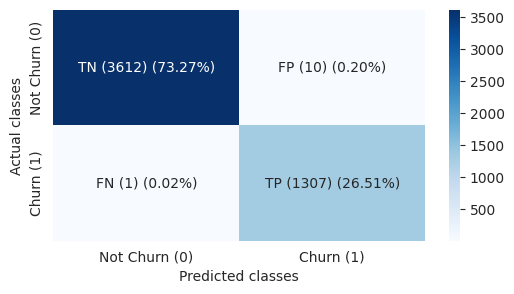

In [286]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.8036    0.7964    0.8000      1552
    Churn (1)     0.4504    0.4617    0.4560       561

     accuracy                         0.7075      2113
    macro avg     0.6270    0.6290    0.6280      2113
 weighted avg     0.7099    0.7075    0.7087      2113

[[1236  316]
 [ 302  259]]


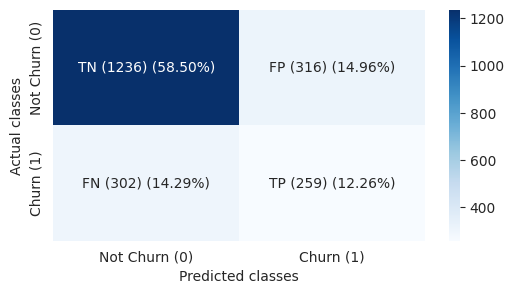

In [251]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

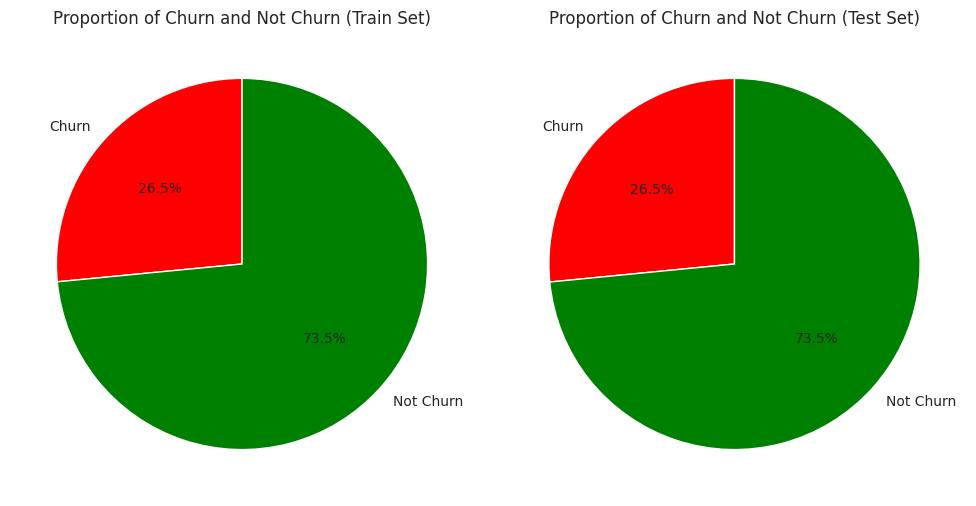

In [248]:
# Calculate the count of churn and not churn instances in y_train
train_churn_count = y_train[y_train['Churn'] == 1].shape[0]
train_not_churn_count = y_train[y_train['Churn'] == 0].shape[0]

# Calculate the count of churn and not churn instances in y_test
test_churn_count = y_test[y_test['Churn'] == 1].shape[0]
test_not_churn_count = y_test[y_test['Churn'] == 0].shape[0]

# Data for pie charts
train_sizes = [train_churn_count, train_not_churn_count]
test_sizes = [test_churn_count, test_not_churn_count]
labels = ['Churn', 'Not Churn']
colors = ['red', 'green']

# Create a subplot with two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(train_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Proportion of Churn and Not Churn (Train Set)')

ax2.pie(test_sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proportion of Churn and Not Churn (Test Set)')

plt.tight_layout()
plt.show()

#### **Question (10)**

Update the bellow cell providing your observations on the model performance

#### **Response (10)**

<div style="background-color: lightgreen;">

**Observations**


- Training Performance:

  1. high accuracy on the training dataset with an accuracy of approximately 99.78%.
  2. Precision for the "Not Churn" class is very high at around 99.97%
  3. Recall for the "Not Churn" class also high which means that the model effectively identifies most of the actual samples of not churning.
  4. Precision for the "Churn" class is around 99.24%, which means that the model's predictions for the churning are accurate.
  5. Recall for the "Churn" class is high( 99.92%), means that the model effectively captures most of the actual instances of churning.
  6. The F1-score for both classes is very high,so it's a good balance between precision and recall.




    **Confusion matrix analysis**: model made 3612 correct predictions for instances that are not churn (True Negatives), 1307 correct predictions for instances that are churn (True Positives), 10 incorrect predictions where instances that are not churn were predicted as churn (False Positives), and 1 incorrect prediction where an instance that is churn was predicted as not churn (False Negative). The model's performance appears to be good based on the confusion matrix on training data... Hope it's not an overfitting :D
      

- Test Performance:

    1. Precision for "Not Churn" is 0.8036, meaning that out of all instances predicted as "Not Churn" (80.36%) were actually "Not Churn"
    2. Recall for "Not Churn" is 0.7964, indicating that the model identified 79.64% of the actual "Not Churn" instances.
    3. F1-score is the harmonic mean of precision and recall. For "Not Churn" the F1-score is 0.8000, and for "Churn" it's 0.4560.
    4. The overall accuracy of the model on the test data is 0.7075, meaning it correctly predicted around 70.75% of instances.

    **Confusion matrix analysis**:
      1. The model correctly predicted 259 instances as "Churn" (TP).
      2. The model accurately classified 1236 instances as "Not Churn"(TN).
      3. The model incorrectly predicted 316 instances as "Churn" when they are actually "Not Churn"(FP).
      4. The model erroneously classified 302 instances as "Not Churn" when they are actually "Churn"(FN).


<div style="background-color: green;">

- Overall observations:
    - **The outstanding performance suggests that the model is well-fitted to the training data.**
    - **The model shows higher precision and recall for "Not Churn" instances compared to "Churn" instances on test data. This could indicate that the model is performing relatively better at identifying "Not Churn" cases. compared to "Churn cases"**
</div>

</div>

[1308, 3622] [561, 1552]


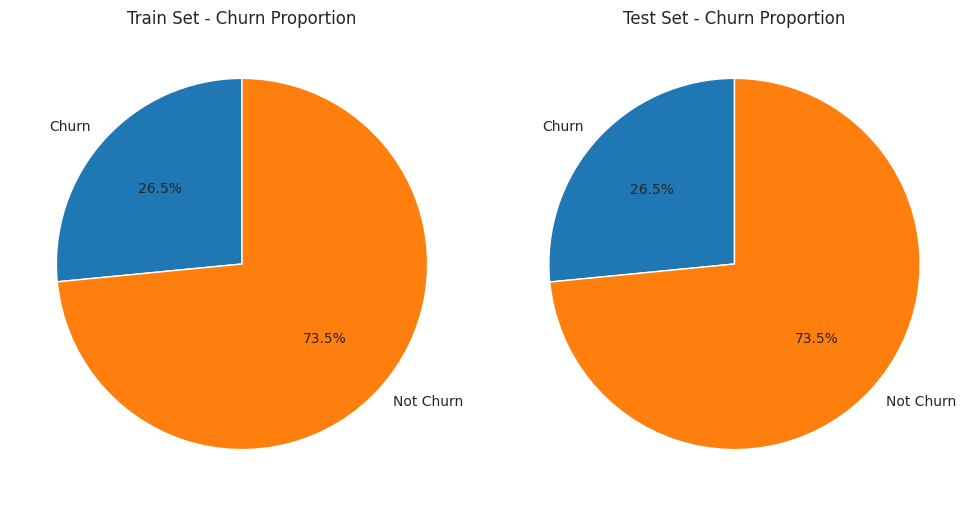

In [252]:
# Calculate the proportions of churn and not churn in the train set
train_churn_proportion = y_train.value_counts()[1]
train_not_churn_proportion = y_train.value_counts()[0]

# Calculate the proportions of churn and not churn in the test set
test_churn_proportion = y_test.value_counts()[1]
test_not_churn_proportion = y_test.value_counts()[0]

# Create labels and proportions for the pie chart
labels = ['Churn', 'Not Churn']
train_proportions = [train_churn_proportion, train_not_churn_proportion]
test_proportions = [test_churn_proportion, test_not_churn_proportion]

print(train_proportions, test_proportions)
# Create subplots for train and test pie charts
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot pie chart for train set
axs[0].pie(train_proportions, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Train Set - Churn Proportion')

# Plot pie chart for test set
axs[1].pie(test_proportions, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Test Set - Churn Proportion')

# Display the pie charts
plt.tight_layout()
plt.show()

**Let's plot the feature importance and check the most important features.**

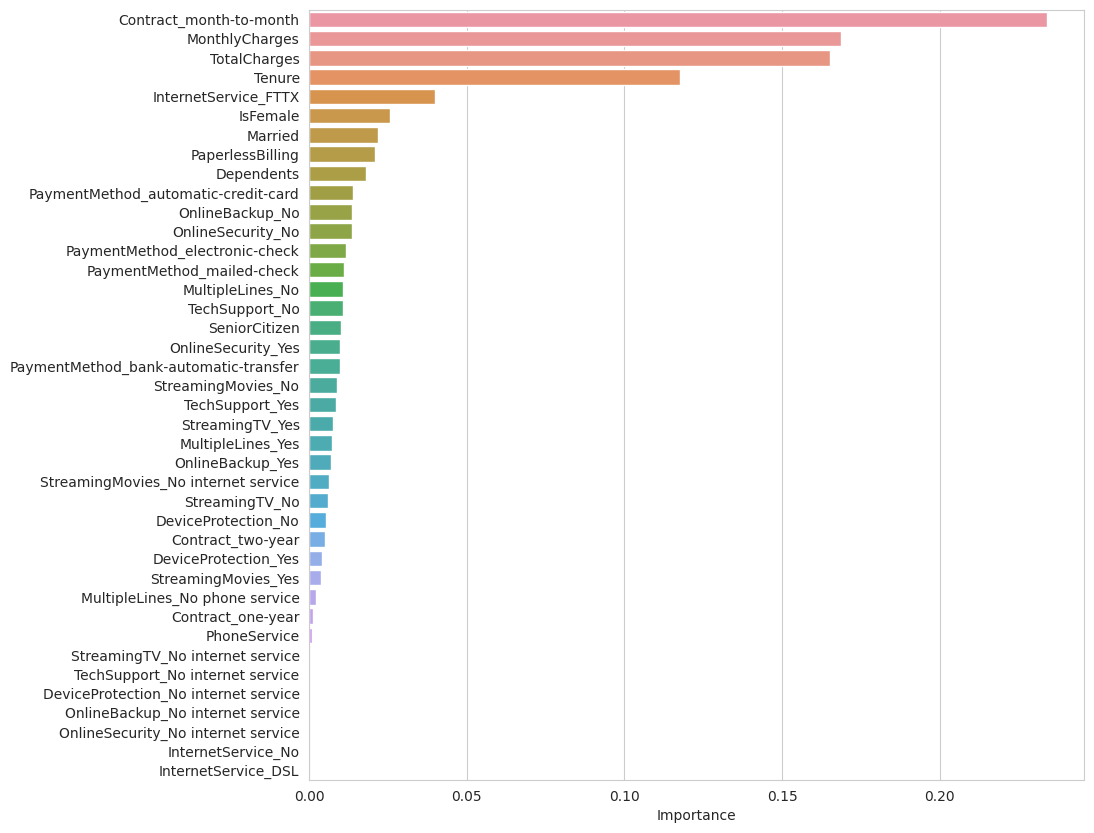

In [303]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

#### **Question (11)**

Update the bellow cell providing your observations on features importance

#### **Response (11)**

In [304]:
importance_df.head(10)

,Importance
Contract_month-to-month,0.23423
MonthlyCharges,0.16877
TotalCharges,0.16520
Tenure,0.11771
InternetService_FTTX,0.04000
IsFemale,0.02570
Married,0.02193
PaperlessBilling,0.02093
Dependents,0.01813
PaymentMethod_automatic-credit-card,0.01399


<div style="background-color: lightgreen;">

**Observations**
* The most important feature appears to be "Contract_month-to-month" with an importance value of 0.23423.
* Other significant features include "MonthlyCharges"(0.16877) "TotalCharges"(0.16520) and "Tenure"(0.11771).
* The "InternetService_FTTX" feature also has some importance (0.04), followed by "IsFemale" (0.02570), "Married" (0.02193), and "PaperlessBilling" (0.02093).

</div>

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

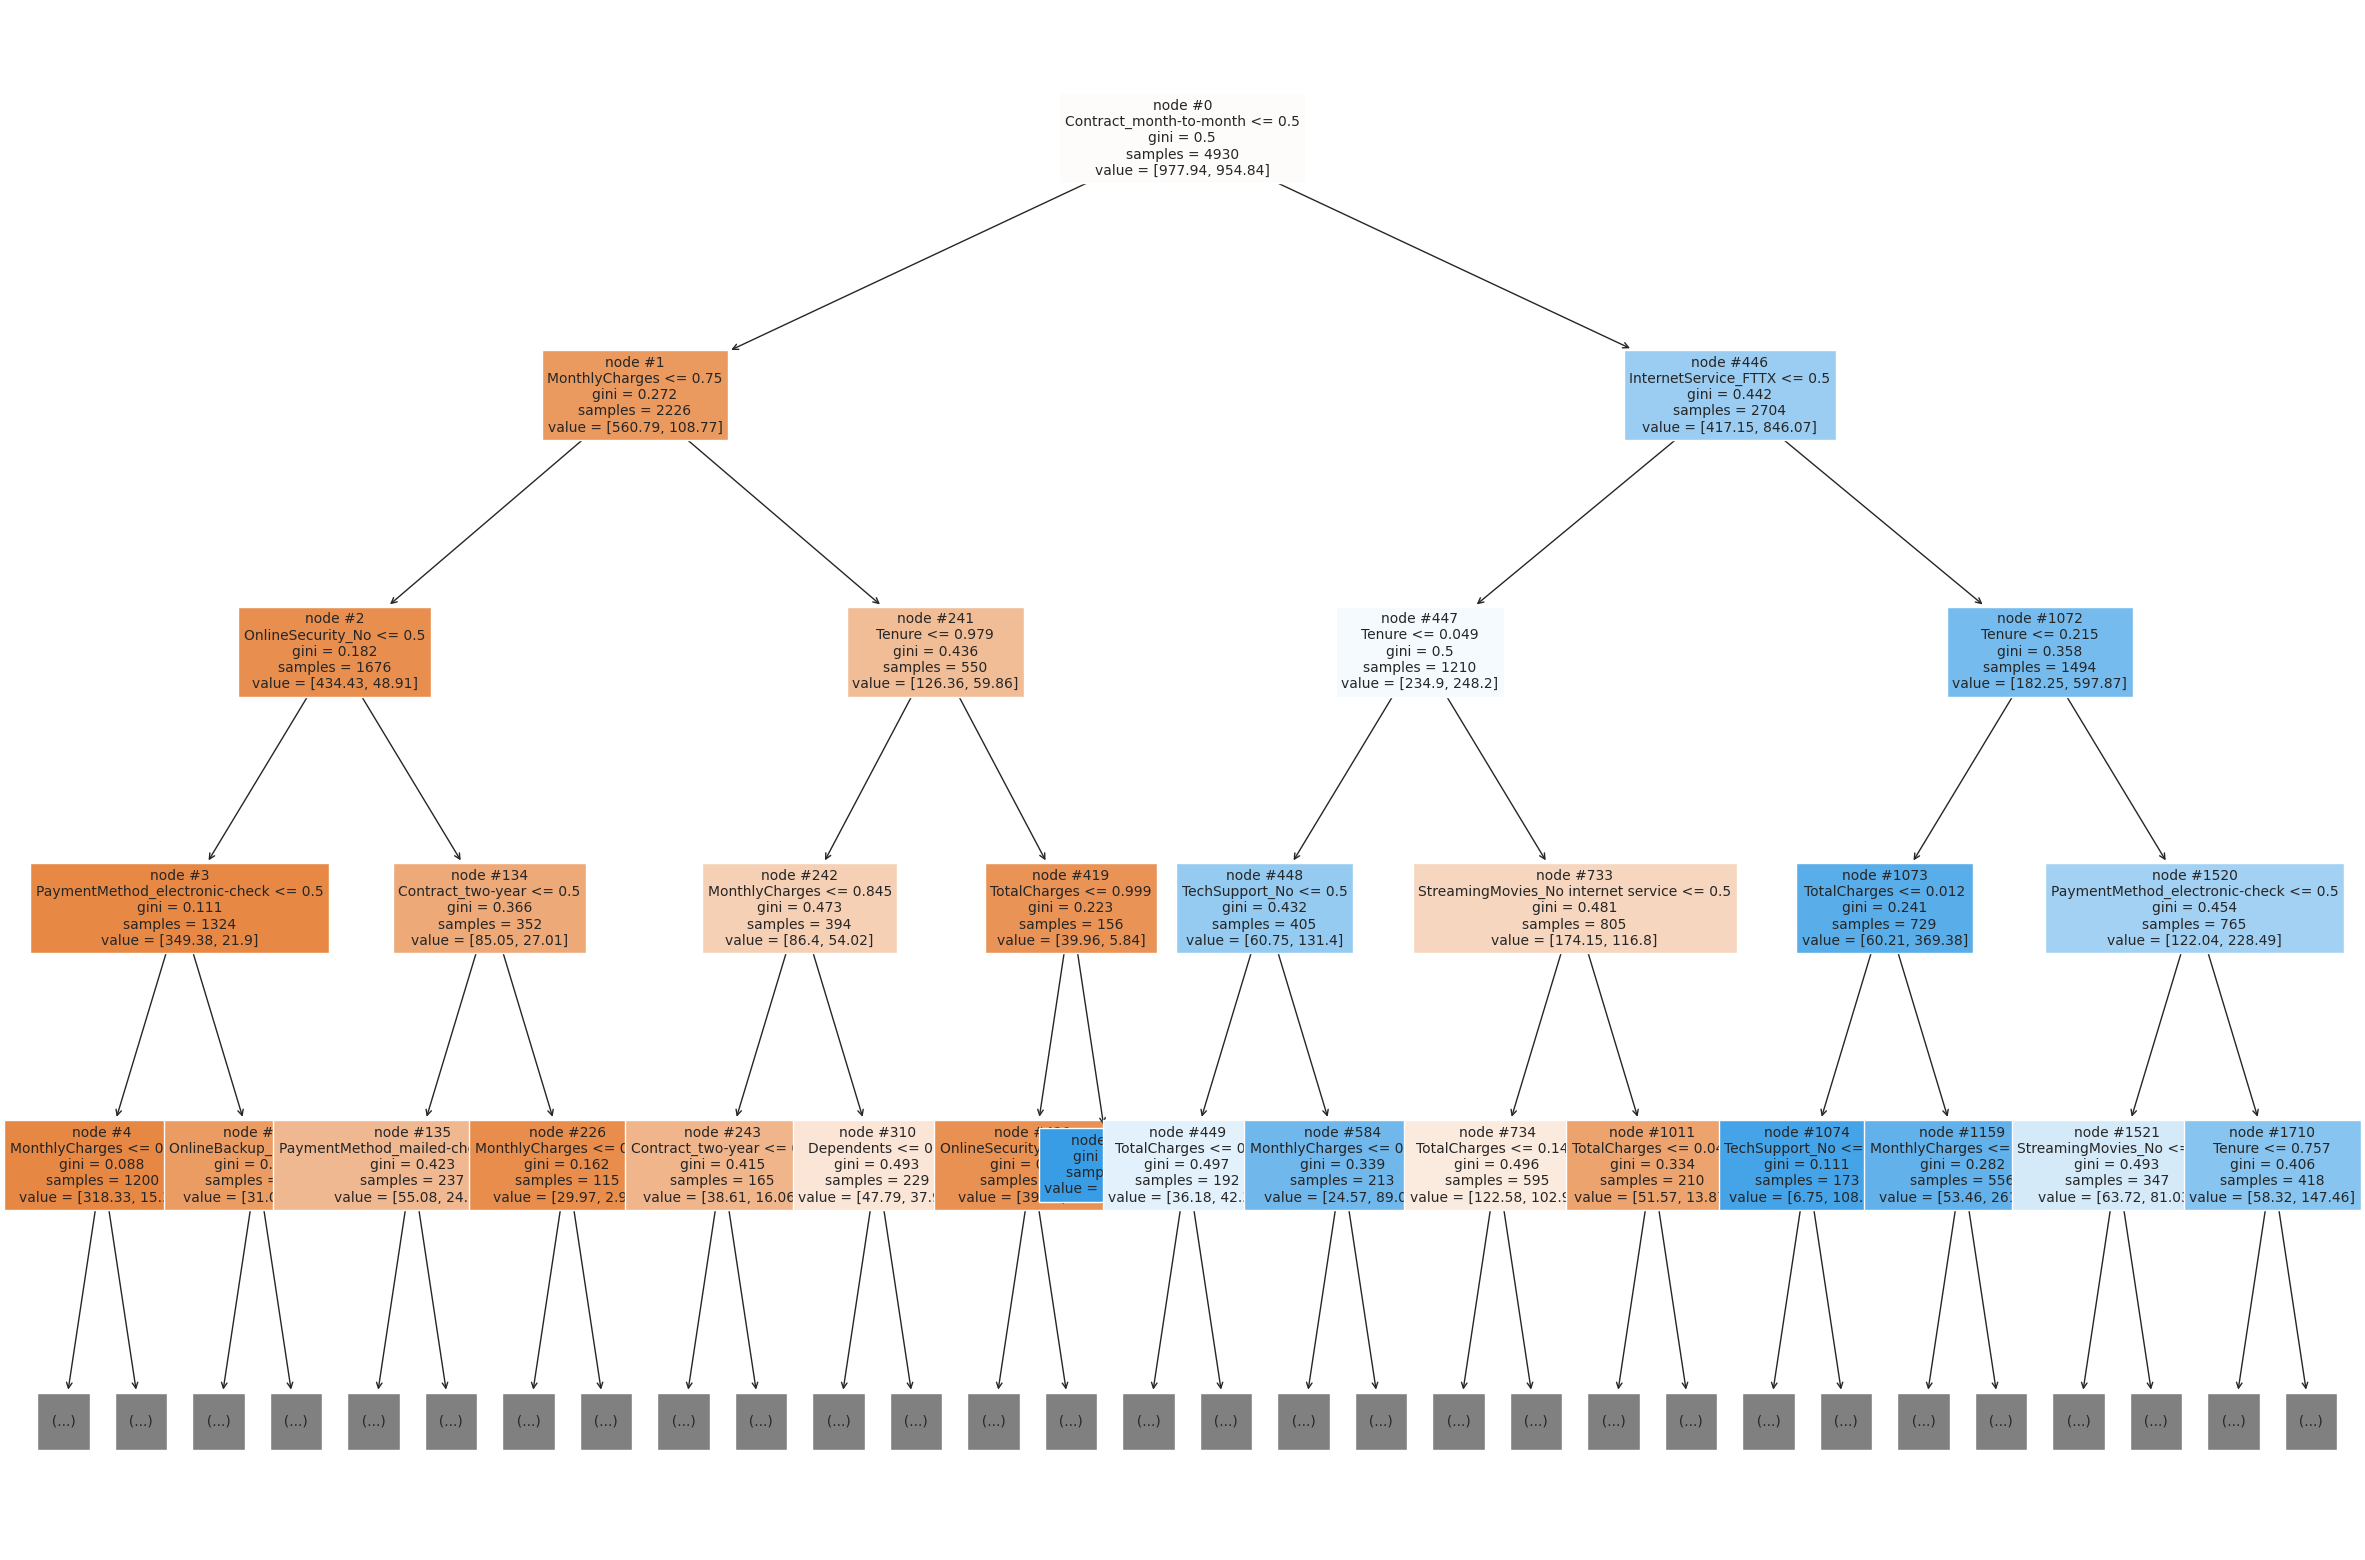

In [291]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=None)
plt.show()

#### **Question (12)**

Update the bellow cell providing your observations on the tree

#### **Response (12)**

In [296]:
# I'm opting for text to better visualize decision tree nodes
r = tree.export_text(dt, feature_names=features, max_depth=4)
print(r)

|--- Contract_month-to-month <= 0.50
|   |--- MonthlyCharges <= 0.75
|   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |--- PaymentMethod_electronic-check <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.51
|   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |--- MonthlyCharges >  0.51
|   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- PaymentMethod_electronic-check >  0.50
|   |   |   |   |--- OnlineBackup_No <= 0.50
|   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |--- OnlineBackup_No >  0.50
|   |   |   |   |   |--- truncated branch of depth 7
|   |   |--- OnlineSecurity_No >  0.50
|   |   |   |--- Contract_two-year <= 0.50
|   |   |   |   |--- PaymentMethod_mailed-check <= 0.50
|   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |--- PaymentMethod_mailed-check >  0.50
|   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- Contract_two-year >  0.50
|   |   |   |   |--- MonthlyCharges <= 0.36


<div style="background-color: lightgreen;">

**Observations**
* The decision tree first splits on the "Contract_month-to-month" feature, indicating that this feature plays a significant role in distinguishing between churn and not churn instances. It further considers the "MonthlyCharges" feature to make decisions within the "Contract_month-to-month" category.

* Within the "Contract_month-to-month" category, the tree examines whether "OnlineSecurity" is "No" and considers the "PaymentMethod_electronic-check" feature. This suggests that customers with no online security and using electronic check as a payment method are more prone to churn.
* The tree also examines the "Tenure" feature to assess customer loyalty. It analyzes the "TotalCharges" to make decisions based on accumulated charges.
* For customers with other contract types (other than "Contract_month-to-month" > 0.50), the tree looks at the "InternetService_FTTX" feature.
* Among customers with "InternetService_FTTX" > 0.50, the tree considers "TechSupport" and "StreamingMovies_No internet service" features.

...

* The tree continues to split based on various features and their thresholds, making decisions to differentiate churn and not churn instances.
  ...
</div>

Let's try to fine tune one hyperparameter `max_depth` and see the results

In [297]:
# Choose the type of classifier
dt_tunned = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion='entropy', max_depth=5)
# Fit the best algorithm to the data
dt_tunned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=5, random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9268    0.6924    0.7927      3622
    Churn (1)     0.4991    0.8486    0.6285      1308

     accuracy                         0.7339      4930
    macro avg     0.7130    0.7705    0.7106      4930
 weighted avg     0.8133    0.7339    0.7491      4930

[[2508 1114]
 [ 198 1110]]


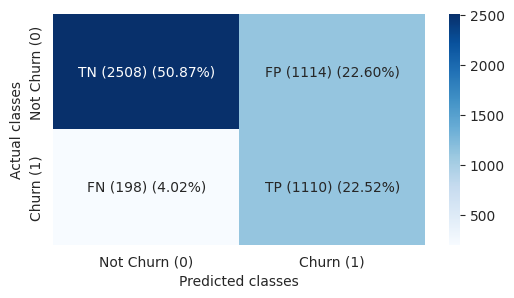

In [298]:
# Checking performance on the training dataset
y_train_pred_dt = dt_tunned.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

               precision    recall  f1-score   support

Not Churn (0)     0.9025    0.6798    0.7755      1552
    Churn (1)     0.4735    0.7968    0.5940       561

     accuracy                         0.7108      2113
    macro avg     0.6880    0.7383    0.6847      2113
 weighted avg     0.7886    0.7108    0.7273      2113

[[1055  497]
 [ 114  447]]


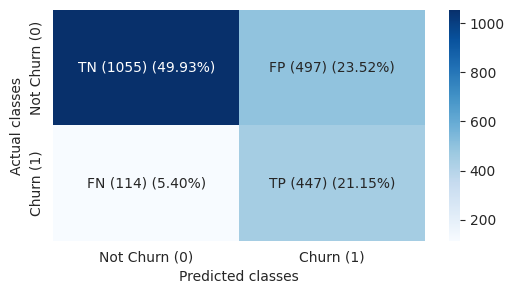

In [299]:
# Checking performance on the test dataset
y_test_pred_dt = dt_tunned.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

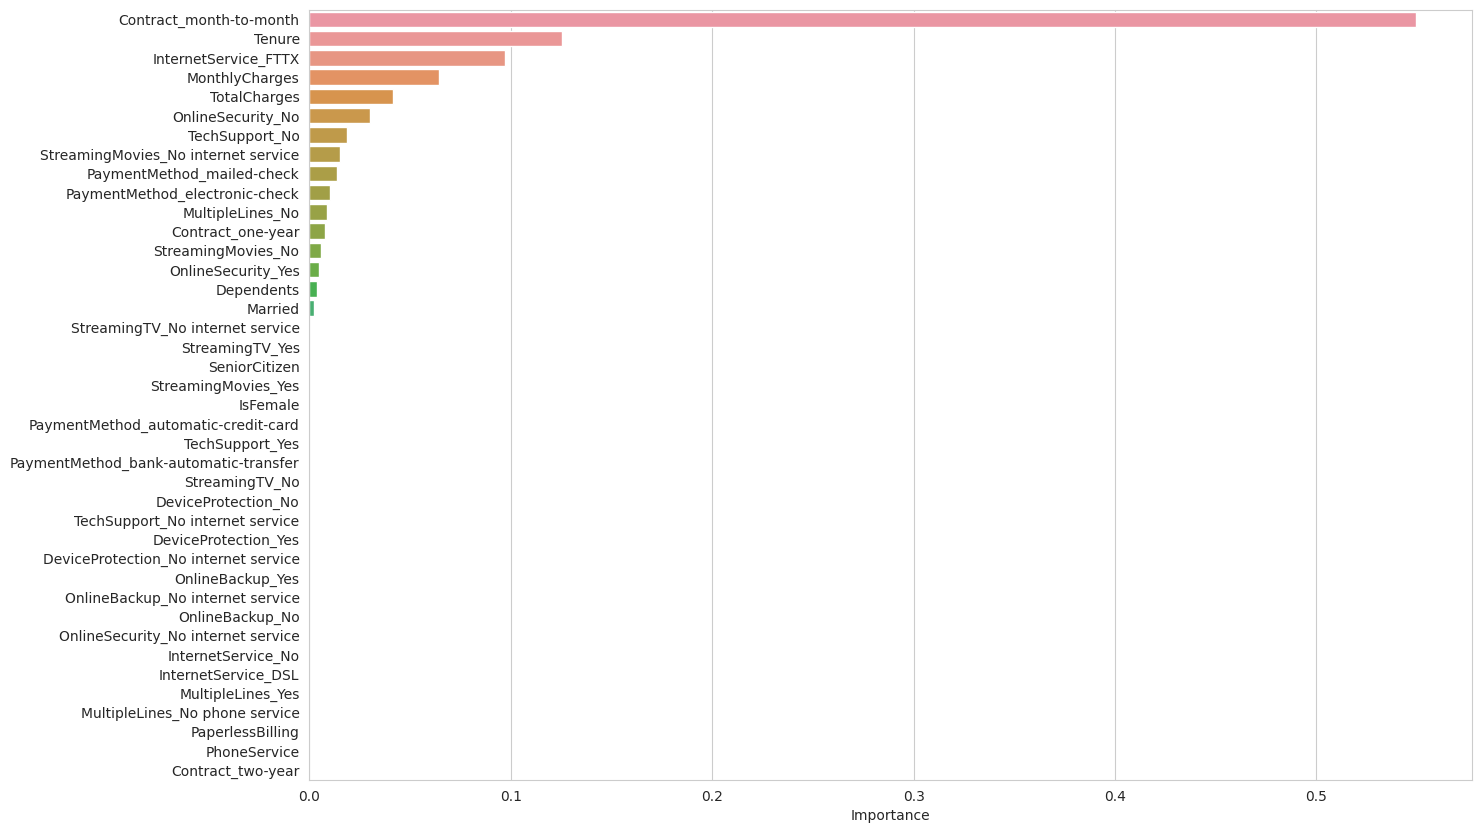

In [305]:
# Plot the feature importance of the tunned model
importances = dt_tunned.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

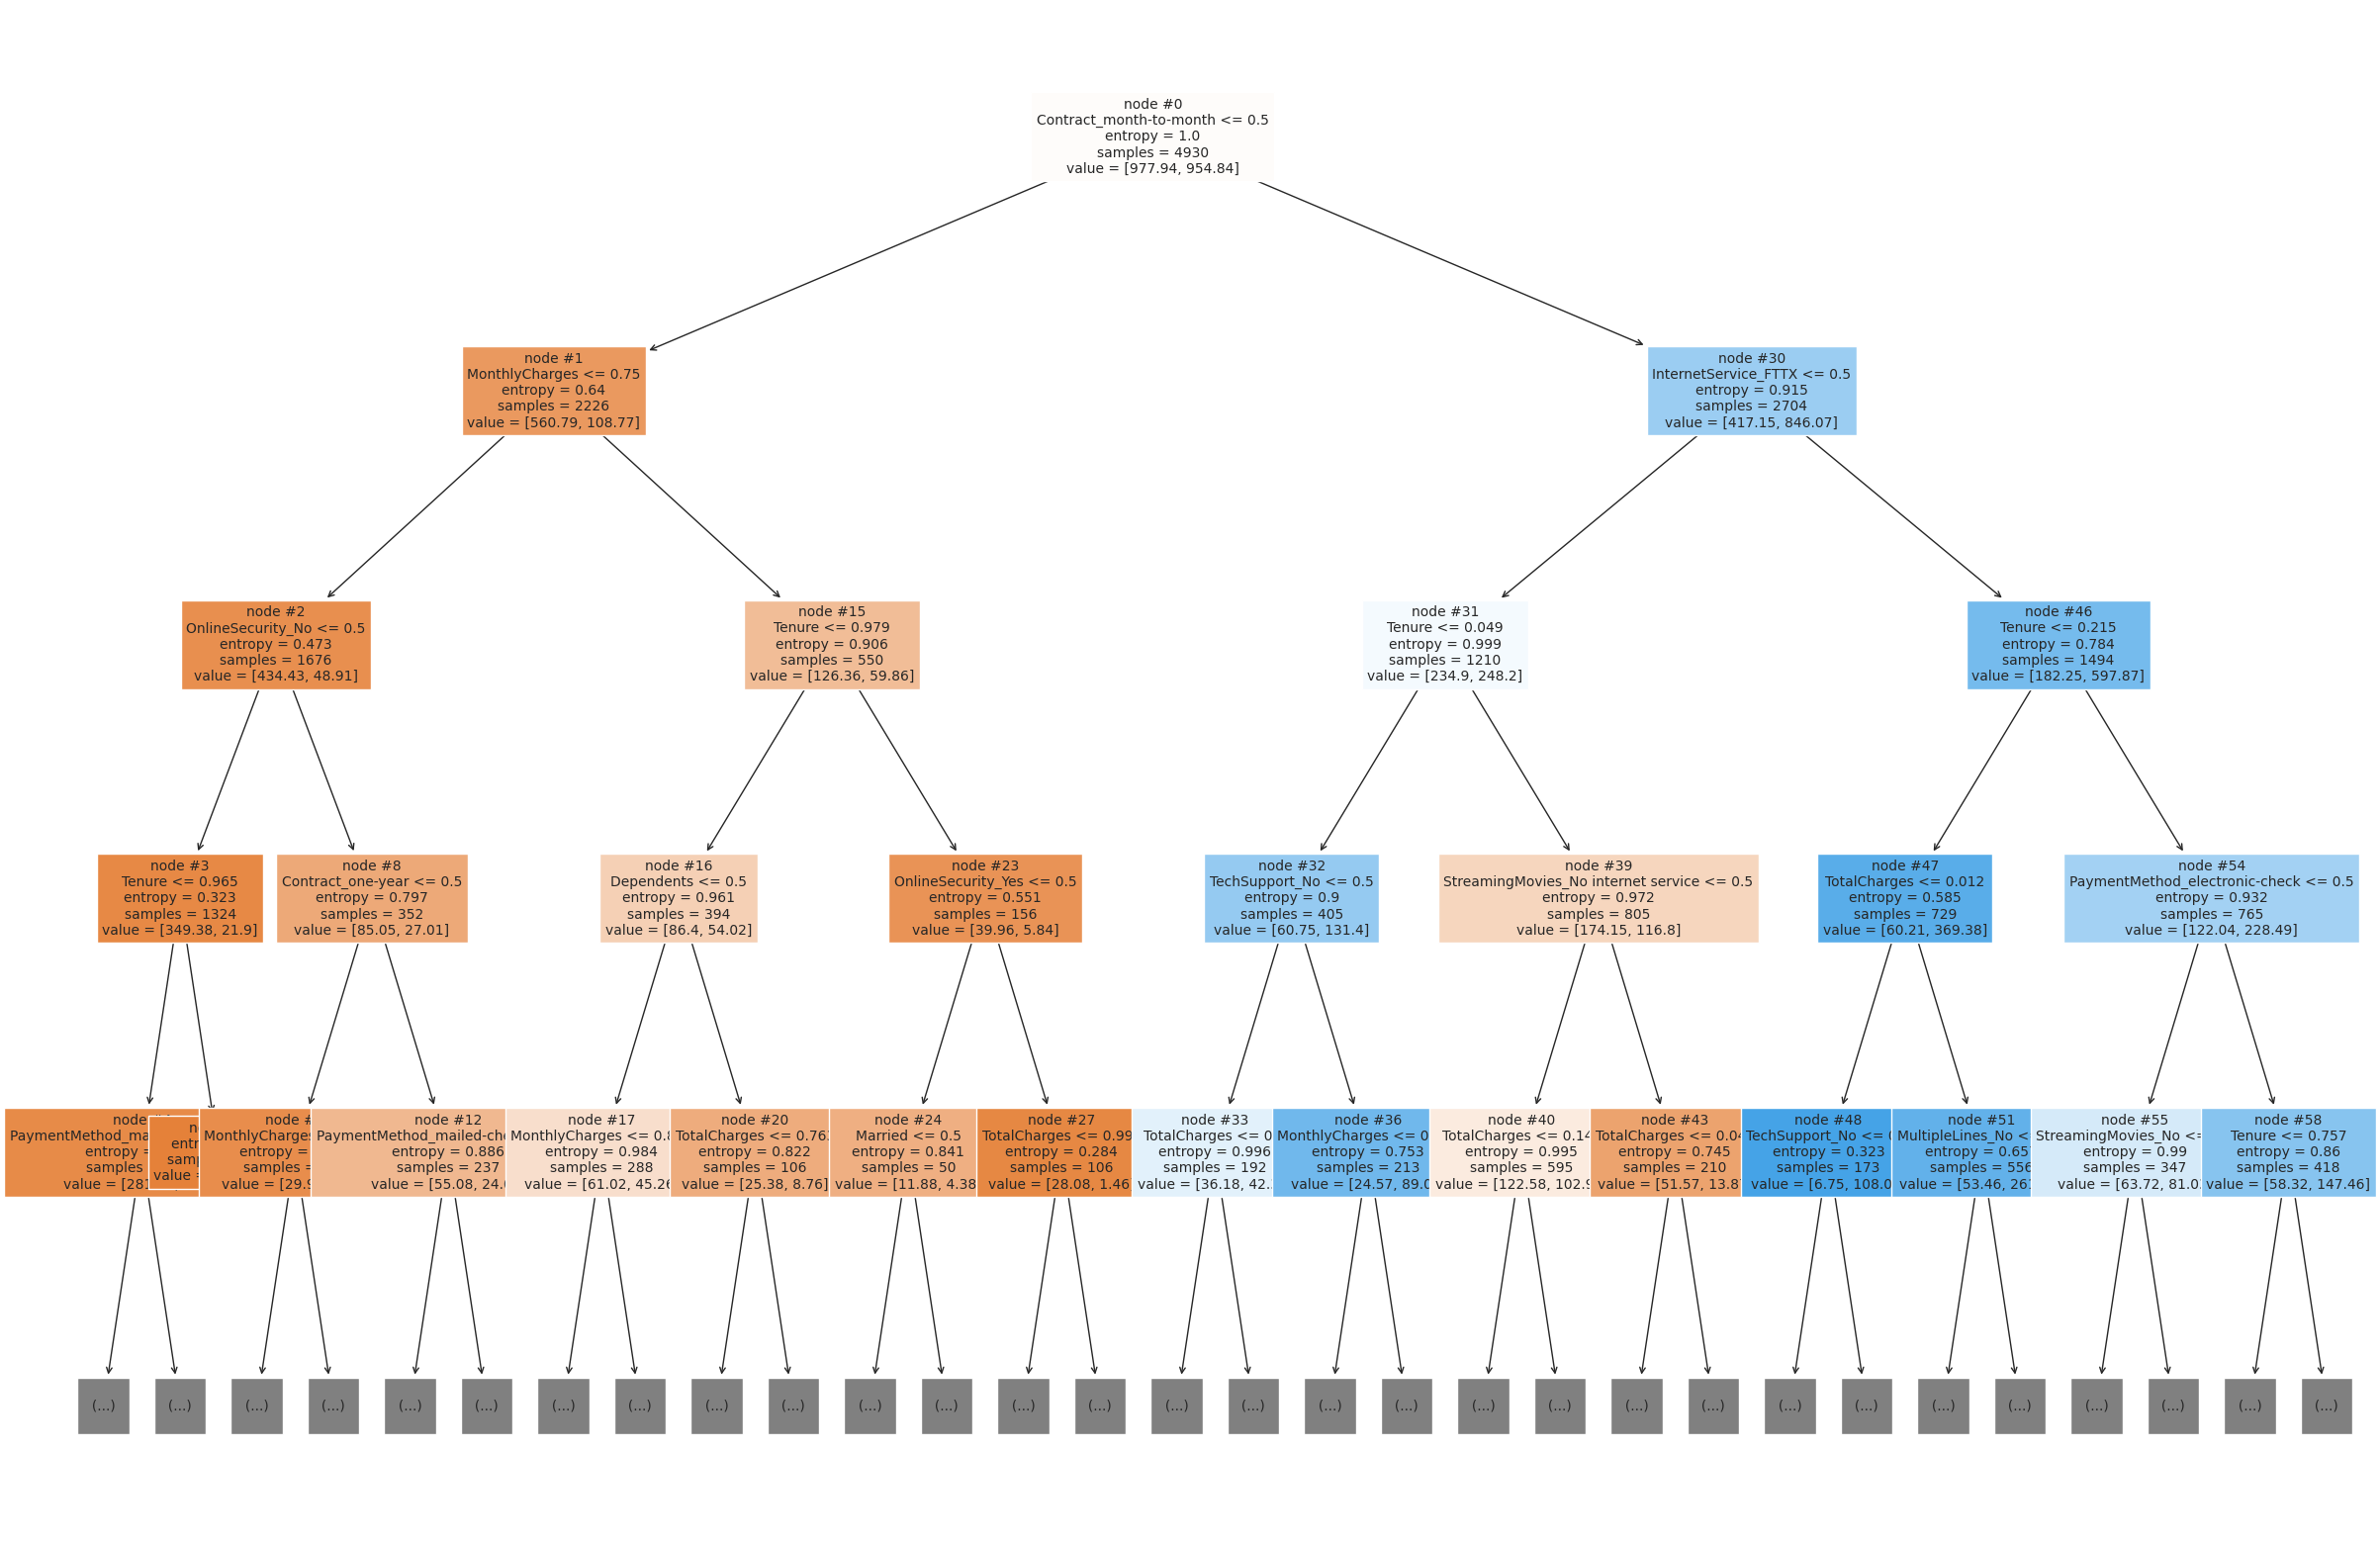

In [306]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=None)
plt.show()

#### **Question (13)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (13)**

In [310]:
# I'm opting for text to better visualize decision tree nodes
r = tree.export_text(dt_tunned, feature_names=features, max_depth=4)
print(r)

|--- Contract_month-to-month <= 0.50
|   |--- MonthlyCharges <= 0.75
|   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |--- Tenure <= 0.97
|   |   |   |   |--- PaymentMethod_mailed-check <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PaymentMethod_mailed-check >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Tenure >  0.97
|   |   |   |   |--- class: 0
|   |   |--- OnlineSecurity_No >  0.50
|   |   |   |--- Contract_one-year <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MonthlyCharges >  0.36
|   |   |   |   |   |--- class: 0
|   |   |   |--- Contract_one-year >  0.50
|   |   |   |   |--- PaymentMethod_mailed-check <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PaymentMethod_mailed-check >  0.50
|   |   |   |   |   |--- class: 1
|   |--- MonthlyCharges >  0.75
|   |   |--- Tenure <= 0.98
|   |   |   |--- Dependents <= 0.50
|   |   |   |   |--- MonthlyCharges <= 0.85
|   |   |   |   |

In [307]:
importance_df.head(10)

,Importance
Contract_month-to-month,0.54968
Tenure,0.12567
InternetService_FTTX,0.09699
MonthlyCharges,0.06428
TotalCharges,0.04175
OnlineSecurity_No,0.03025
TechSupport_No,0.01846
StreamingMovies_No internet service,0.01533
PaymentMethod_mailed-check,0.01388
PaymentMethod_electronic-check,0.01043


<div style="background-color: lightgreen;">

**Observations**

**- The performance of the tunned decision tree**
* Precision has increased from 0.4504 to 0.4735. This means that out of all predicted churn cases, 47.35% are actually true churn cases, indicating some improvement in correctly identifying churn instances.
* Recall has increased significantly from 0.4617 to 0.7968. This implies that the model is better at capturing actual churn instances.
* Precision has increased from 0.8036 to 0.9025 for non-churn class. This means that out of all predicted non-churn cases, 90.25% are actually true non-churn cases. The model shows a higher ability to correctly identify non-churn instances.
* Recall has decreased from 0.7964 to 0.6798. This indicates that the model is slightly less effective at capturing all actual non-churn cases.
* The F1-score for the "Churn" class has improved from 0.4560 to 0.5940, reflecting a better balance between precision and recall for this class.
* The overall accuracy has slightly increased from 0.7075 to 0.7108.

**- Features importance**
* contract_month-to-month feature still holds high importance, even more so than in the previous model. This reaffirms that customers with month-to-month contracts are a key segment for predicting churn.
* tenure has gained importance in this model. It suggests that among customers with other contract types (non-month-to-month), tenure becomes a more distinguishing factor for churn prediction.
* InternetService_FTTX: Retains significanct, indicating that the type of internet service remains an important factor in predicting churn.
* MonthlyCharges and TotalCharges still important but less so than in the default max_depth model.

**- The tree**

* The new decision tree has a limited depth of 5, which means it's a shallower tree(it's less complex and may generalize better to new data, as it avoids overfitting to the training data) compared to the previous one with the default max_depth.
* Factors like "OnlineSecurity," "Tenure," "MonthlyCharges," and "Dependents" play a role in making predictions for different segments of customers.
* The tree uses a combination of factors to predict whether a customer is likely to churn or not. For instance, customers with non-monthly contracts and low "MonthlyCharges" are less likely to churn.
* The presence of certain payment methods, like "PaymentMethod_mailed-check" and "PaymentMethod_electronic-check," contributes to predicting churn in specific scenarios.

Overall, the new decision tree model with a max_depth of 5 appears to have simplified the decision process by focusing on key features and their interactions. This could potentially lead to improved generalization and interpretation compared to the previous model with default max_depth. 
</div>

Let's try to fine tune multiple hyperparameters and see the results.

It's up to you to expirements multiple values to find the best paramaters.

<span style="color:#ff5f27;"> 👾 Uncomment and update the following cell code if required, cf `parameters` </span>

In [361]:
# Choose the type of classifier
dt_tunned_hp = DecisionTreeClassifier(random_state=1, class_weight={0: 0.27, 1: 0.73}, criterion='entropy')

# Grid of parameters to choose from
parameters = {
    'max_depth': [4, 5, 7],                # Try different depths to control overfitting
    'min_samples_split': [10, 12, 15],           # Minimum samples required to split an internal node
    'min_samples_leaf': [12, 15, 20]
     }
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(dt_tunned, parameters, scoring=scorer, cv=15)
recall_score
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_tunned_hp = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_tunned_hp.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.27, 1: 0.73}, criterion='entropy',
                       max_depth=5, min_samples_leaf=15, min_samples_split=10,
                       random_state=1)

               precision    recall  f1-score   support

Not Churn (0)     0.9264    0.6916    0.7920      3622
    Churn (1)     0.4982    0.8479    0.6276      1308

     accuracy                         0.7331      4930
    macro avg     0.7123    0.7697    0.7098      4930
 weighted avg     0.8128    0.7331    0.7484      4930

[[2505 1117]
 [ 199 1109]]


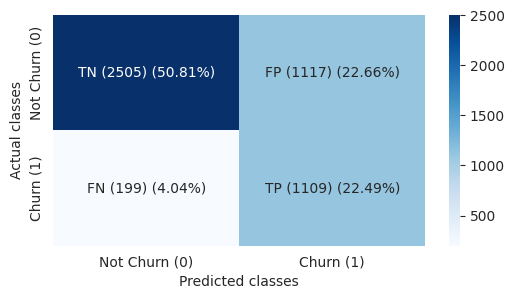

In [363]:
# Checking performance of the tunned DT model on the training data
y_pred_train_dt_tunned = dt_tunned_hp.predict(X_train)
metrics_score(y_train, y_pred_train_dt_tunned)

               precision    recall  f1-score   support

Not Churn (0)     0.9033    0.6798    0.7757      1552
    Churn (1)     0.4741    0.7986    0.5950       561

     accuracy                         0.7113      2113
    macro avg     0.6887    0.7392    0.6853      2113
 weighted avg     0.7893    0.7113    0.7277      2113

[[1055  497]
 [ 113  448]]


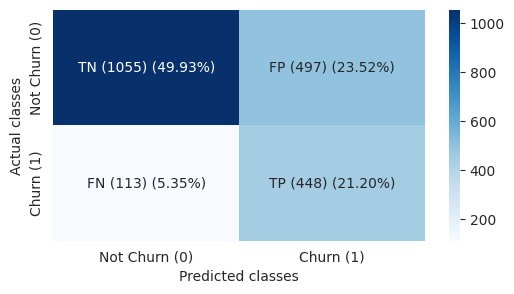

In [364]:
# Checking performance ofthe DT tunned on the testing data
y_pred_test_dt_tunned = dt_tunned_hp.predict(X_test)
metrics_score(y_test, y_pred_test_dt_tunned)

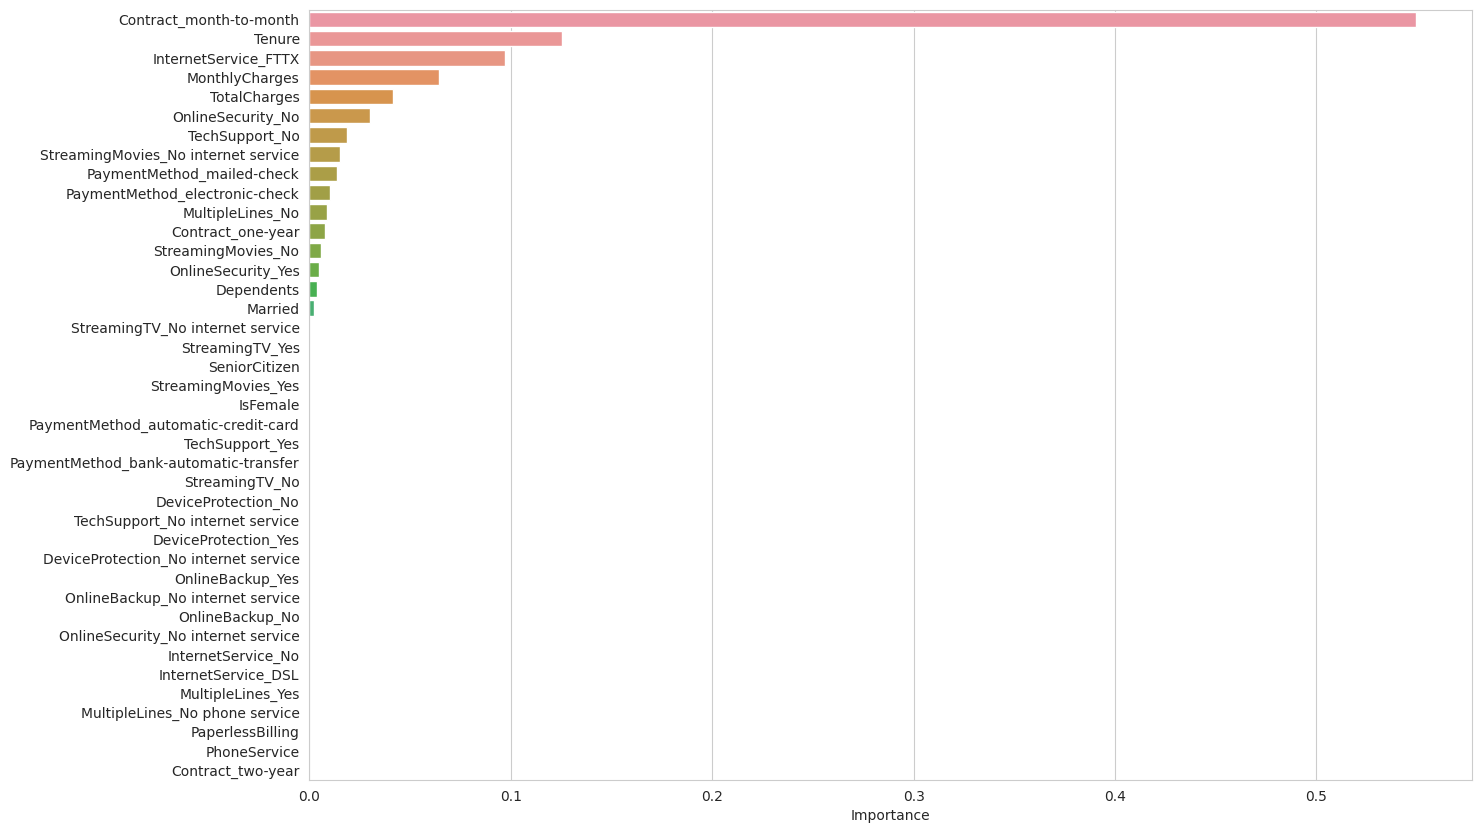

In [341]:
# Plot the feature importance of the tunned model
importances = dt_tunned_hp.feature_importances_
columns = X_train.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.show()

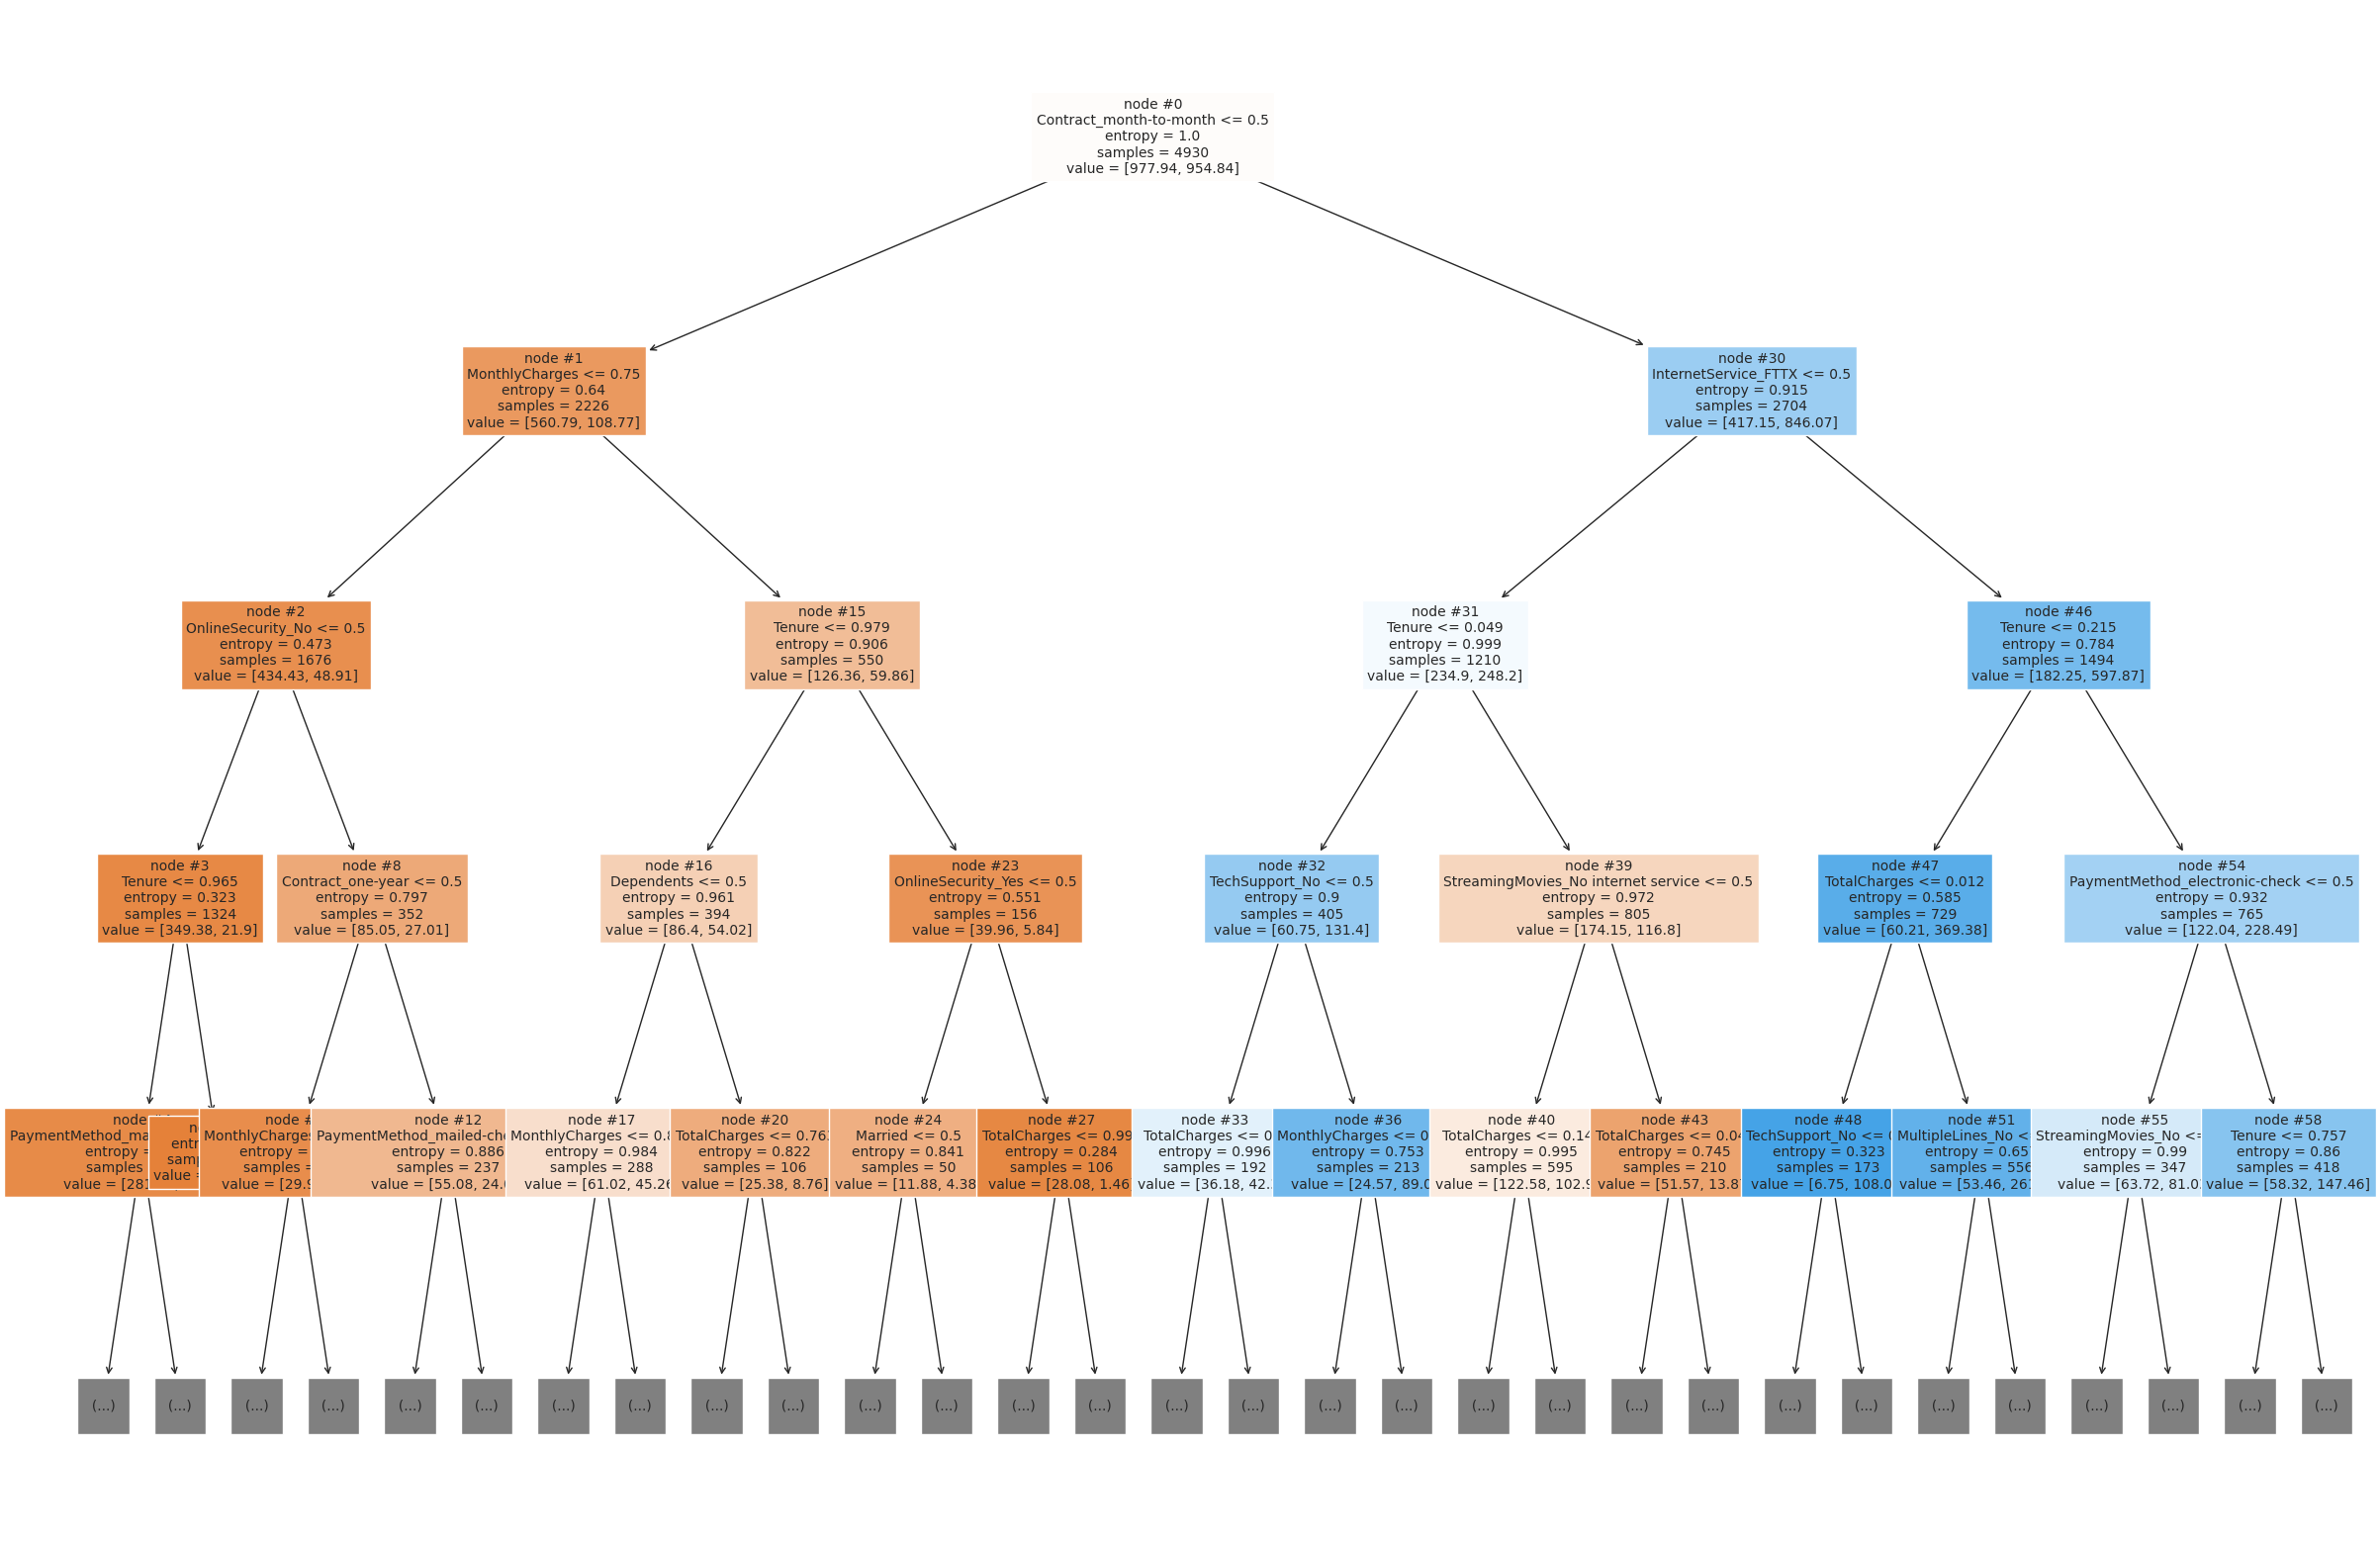

In [321]:
features = list(X_train.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt_tunned_hp, max_depth=4, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=None)
plt.show()

#### **Question (14)**

Update the bellow cell providing your observations on :
* The performance of the tunned decision tree
* The features importance
* The tree

#### **Response (14)**

<div style="background-color: lightgreen;">

**Observations**
* I experienced with many combinations but no major improvements on the test set. Let's explore with other classifiers to if that's better suits the dataset
</div>

In [394]:
!pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached lightgbm-4.0.0-py3-none-manylinux_2_28_x86_64.whl (3.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:02

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# **Experiencing with many classifiers**

# **Neural Network**

## **Question (15)**

This is a bonus/optionnal question.

* Can apply a new approach to the problem using **ANN**
* Feel free with your imagination here

**Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [397]:
# Scaling the data
sc = StandardScaler()

# Complete the code to scale the data
X_train_scaled = sc.fit_transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

In [398]:
X_train.values.shape

(4930, 40)

In [399]:
X_train_scaled.shape, X_test_scaled.shape

((4930, 40), (2113, 40))

In [379]:
X_train_scaled[:5].T

array([[-0.43814715,  2.28233828, -0.43814715, -0.43814715, -0.43814715],
       [-0.96295739, -0.96295739,  1.03846754, -0.96295739, -0.96295739],
       [-0.65086184, -0.65086184, -0.65086184, -0.65086184, -0.65086184],
       [-1.11455597, -1.19575332, -1.19575332,  1.11837111, -0.83036525],
       [ 0.33445908,  0.33445908,  0.33445908,  0.33445908,  0.33445908],
       [-1.20529512,  0.82967232,  0.82967232, -1.20529512,  0.82967232],
       [ 0.50485198,  0.72484976,  0.337786  ,  0.51643081,  1.12349235],
       [-0.83853354, -0.9098221 , -0.91165561,  1.1097003 , -0.5169274 ],
       [ 1.04907288,  1.04907288, -0.95322262, -0.95322262,  1.04907288],
       [-0.33445908, -0.33445908, -0.33445908, -0.33445908, -0.33445908],
       [-0.85678685, -0.85678685,  1.16715143,  1.16715143, -0.85678685],
       [-0.72059725, -0.72059725, -0.72059725,  1.38773774, -0.72059725],
       [ 1.12453737,  1.12453737,  1.12453737, -0.88925458,  1.12453737],
       [-0.52587133, -0.52587133, -0.5

In [400]:
# Convert scaled arrays back to pandas DataFrame to visualize it
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# We have a np.ndarray not a pd.DataFrame that why we cannot head() it directly
X_train_scaled_df.head().T

,0,1,2,3,4
SeniorCitizen,-0.43815,2.28234,-0.43815,-0.43815,-0.43815
Married,-0.96296,-0.96296,1.03847,-0.96296,-0.96296
Dependents,-0.65086,-0.65086,-0.65086,-0.65086,-0.65086
Tenure,-1.11456,-1.19575,-1.19575,1.11837,-0.83037
PhoneService,0.33446,0.33446,0.33446,0.33446,0.33446
PaperlessBilling,-1.20530,0.82967,0.82967,-1.20530,0.82967
MonthlyCharges,0.50485,0.72485,0.33779,0.51643,1.12349
TotalCharges,-0.83853,-0.90982,-0.91166,1.10970,-0.51693
MultipleLines_No,1.04907,1.04907,-0.95322,-0.95322,1.04907
MultipleLines_No phone service,-0.33446,-0.33446,-0.33446,-0.33446,-0.33446


In [402]:
X_test_scaled_df.head().T

,0,1,2,3,4
SeniorCitizen,-0.43815,-0.43815,2.28234,-0.43815,-0.43815
Married,-0.96296,1.03847,-0.96296,-0.96296,1.03847
Dependents,-0.65086,1.53642,-0.65086,-0.65086,1.53642
Tenure,-0.58677,-0.99276,-0.50558,-0.50558,0.30640
PhoneService,0.33446,0.33446,0.33446,0.33446,0.33446
PaperlessBilling,0.82967,-1.20530,0.82967,0.82967,-1.20530
MonthlyCharges,1.02921,-1.51814,1.11191,-1.49663,-1.49994
TotalCharges,-0.24638,-0.91823,-0.20180,-0.82319,-0.65313
MultipleLines_No,1.04907,1.04907,-0.95322,1.04907,1.04907
MultipleLines_No phone service,-0.33446,-0.33446,-0.33446,-0.33446,-0.33446


In [405]:
X_train_scaled.shape, X_test_scaled.shape

((4930, 40), (2113, 40))

In [406]:
# Initializing the ANN
model = Sequential()

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation='relu', input_dim=X_train_scaled.shape[1], units=(X_train_scaled.shape[1] + 1) // 2))

# Add 1st hidden layer
model.add(Dense(units=16, activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or Not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

2023-08-28 00:47:17.561514: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [407]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [408]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,173
Trainable params: 1,173
Non-trainable params: 0
_________________________________________________________________


In [409]:
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
124/124 [==============================] - 2s 6ms/step - loss: 0.4713 - accuracy: 0.7566 - val_loss: 0.4474 - val_accuracy: 0.7718
Epoch 2/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.7916 - val_loss: 0.4401 - val_accuracy: 0.7799
Epoch 3/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.8002 - val_loss: 0.4402 - val_accuracy: 0.7647
Epoch 4/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4171 - accuracy: 0.8048 - val_loss: 0.4420 - val_accuracy: 0.7617
Epoch 5/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8076 - val_loss: 0.4375 - val_accuracy: 0.7880
Epoch 6/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8078 - val_loss: 0.4374 - val_accuracy: 0.7667
Epoch 7/50
124/124 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8098 - val_loss: 0.4336 - val_accuracy: 0.7809
Epoch 

67/67 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7899


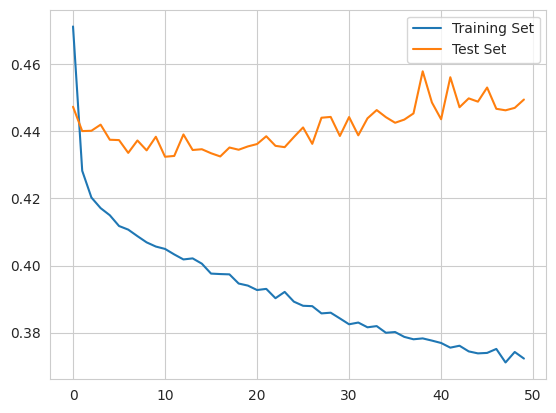

In [410]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Training Set" , "Test Set") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step
Best Threshold=0.284766, G-Mean=0.763


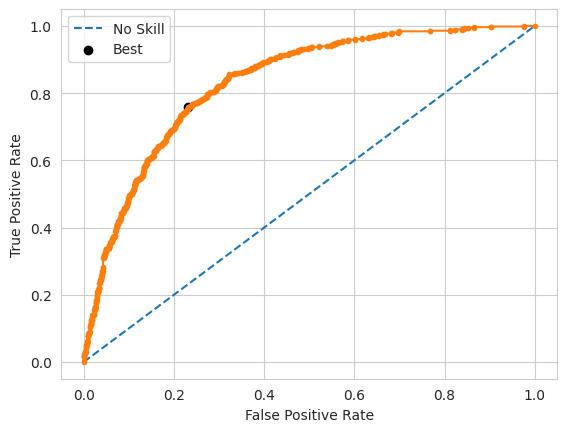

In [411]:
# predict probabilities
yhat = model.predict(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

67/67 [==============================] - 0s 2ms/step
               precision    recall  f1-score   support

Not Churn (0)     0.8970    0.7687    0.8279      1552
    Churn (1)     0.5415    0.7558    0.6310       561

     accuracy                         0.7653      2113
    macro avg     0.7192    0.7622    0.7294      2113
 weighted avg     0.8026    0.7653    0.7756      2113

[[1193  359]
 [ 137  424]]


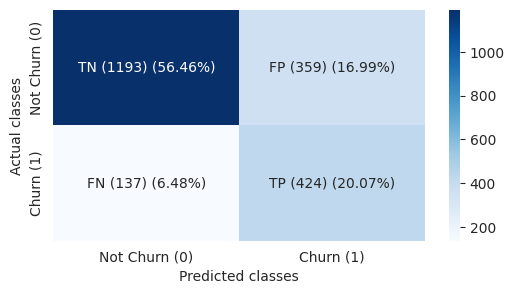

In [412]:
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
metrics_score(y_test, y_pred_test)

**Observation**

- The neural network achieved higher accuracy (76.53%) compared to the decision tree (71.13%), indicating better overall predictive performance.
- Higher precision and recall values for both "Churn" class, showing its ability to better differentiate and predict the minority class.
- higher F1-scores for both classes, indicating a better balance between precision and recall.
- The neural network has more false negatives but more fewer false positives compared to the decision tree.

# **Another architecture using Keras**

In [473]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

# Initializing the ANN
model = Sequential()

# Input layer and first hidden layer with Leaky ReLU activation
model.add(Dense(units=100 // 2, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Adding a dropout layer to reduce overfitting
model.add(Dropout(0.4))

# Second hidden layer with Leaky ReLU activation
model.add(Dense(units=80))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Adding another dropout layer
model.add(Dropout(0.4))

# Third hidden layer with Leaky ReLU activation
model.add(Dense(units=40))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Fourth hidden layer with Leaky ReLU activation
model.add(Dense(units=20))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Adding dropout layer
model.add(Dropout(0.4))

# Fifth hidden layer with Leaky ReLU activation
model.add(Dense(units=10))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

In [474]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [475]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 50)                2050      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 50)                0         
                                                                 
 dropout_20 (Dropout)        (None, 50)                0         
                                                                 
 dense_45 (Dense)            (None, 80)                4080      
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 80)                0         
                                                                 
 dropout_21 (Dropout)        (None, 80)                0         
                                                                 
 dense_46 (Dense)            (None, 40)               

In [480]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)

# Model training with early stopping
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8139 - val_loss: 0.4363 - val_accuracy: 0.7809
Epoch 2/100
62/62 [==============================] - 0s 5ms/step - loss: 0.4142 - accuracy: 0.8144 - val_loss: 0.4416 - val_accuracy: 0.7819
Epoch 3/100
62/62 [==============================] - 0s 5ms/step - loss: 0.4072 - accuracy: 0.8195 - val_loss: 0.4429 - val_accuracy: 0.7779
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8126 - val_loss: 0.4386 - val_accuracy: 0.7809
Epoch 5/100
62/62 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.8134 - val_loss: 0.4380 - val_accuracy: 0.7830
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.8159 - val_loss: 0.4441 - val_accuracy: 0.7819
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8159 - val_loss: 0.4368 - val_accuracy: 0.7840
Epoch 8/100
6

67/67 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7956


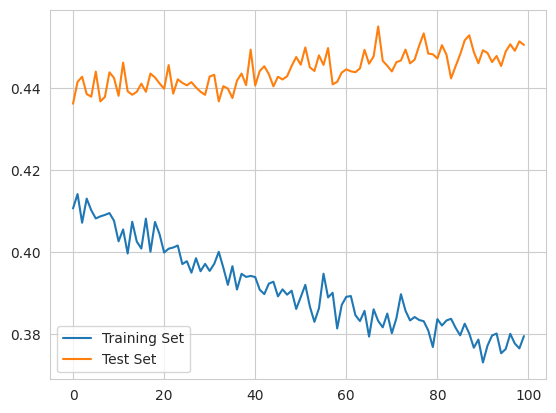

In [481]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("Training Set" , "Test Set") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step
Best Threshold=0.272923, G-Mean=0.761


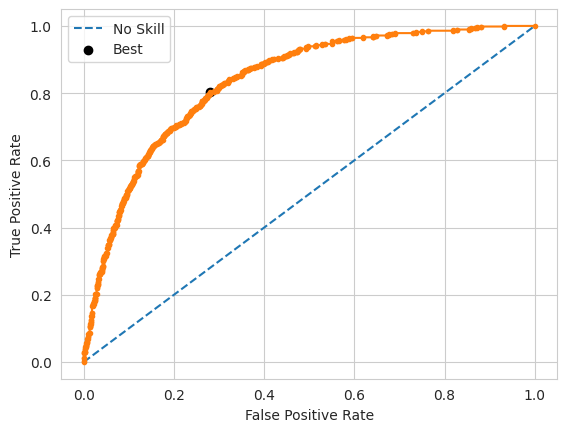

In [482]:
# predict probabilities
yhat = model.predict(X_test)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

67/67 [==============================] - 0s 2ms/step
               precision    recall  f1-score   support

Not Churn (0)     0.9097    0.7204    0.8040      1552
    Churn (1)     0.5090    0.8021    0.6228       561

     accuracy                         0.7421      2113
    macro avg     0.7094    0.7612    0.7134      2113
 weighted avg     0.8033    0.7421    0.7559      2113

[[1118  434]
 [ 111  450]]


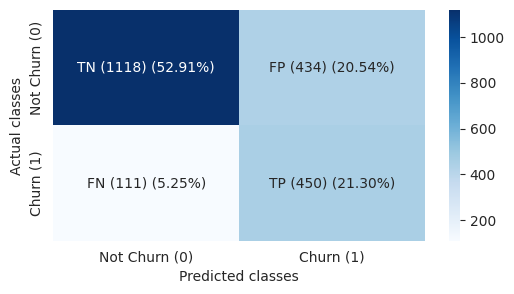

In [489]:
y_pred_test = model.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
class_report, cm = metrics_score(y_test, y_pred_test)

In [505]:
import json
# Save the model to a file
model.save('models/v1.0/churn_classifier_v1.h5')

# Write the classification report to a text file
with open('models/v1.0/classification_report.txt', 'w') as f:
        f.write(class_report)

# Extract TP, TN, FP, FN from the confusion matrix
tn, fp, fn, tp = cm.ravel()
with open('models/v1.0/confusion_matrix.json', 'w') as f:
    json.dump({'confusion_matrix': {
            'true_positive': int(tp),
            'true_negative': int(tn),
            'false_positive': int(fp),
            'false_negative': int(fn) }}, f, indent=4)